#Trade and Ahead Project

# Objective

Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.


# Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

Data Dictionary

**Ticker Symbol**: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market \
**Company**: Name of the company \
**GICS Sector**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations \
**GICS Sub Industry**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations \
**Current Price**: Current stock price in dollars \
**Price Change**: Percentage change in the stock price in 13 weeks \
**Volatility**: Standard deviation of the stock price over the past 13 weeks \
**ROE**: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt) \
**Cash Ratio**: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities \
**Net Cash Flow**: The difference between a company's cash inflows and outflows (in dollars) \
**Net Income**: Revenues minus expenses, interest, and taxes (in dollars) \
**Earnings Per Share**: Company's net profit divided by the number of common shares it has outstanding (in dollars) \
**Estimated Shares Outstanding**: Company's stock is currently held by all its shareholders \
**P/E Ratio**: Ratio of the company's current stock price to the earnings per share \
**P/B Ratio**: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities) \

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To perform Scaling on features
from sklearn.preprocessing import StandardScaler

# To find distances among datapoints
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# Importing modules used for K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [2]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


# Exploratory Data Analysis

## Reading Data

In [3]:
# Reading csv file containing the data
data = pd.read_csv("stock_data.csv")

In [4]:
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

## Checking Datatype of Variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

## Statistical summary of Data

In [6]:
print('Summary for Categorical Features')
display(data.describe(include='object'))

Summary for Categorical Features


Ticker Symbol                 Security  GICS Sector  \
count            340                      340          340   
unique           340                      340           11   
top              AAL  American Airlines Group  Industrials   
freq               1                        1           53   

                         GICS Sub Industry  
count                                  340  
unique                                 104  
top     Oil & Gas Exploration & Production  
freq                                    16

In [7]:
print('Summary for Numerical features')
display(data.describe())

Summary for Numerical features


Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

## Checking any missing values

In [8]:
data.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

## Checking Duplicate Values

In [9]:
# let's check for duplicate observations
data.duplicated().sum()

0

There are no duplicate values in the data

## Dropping Company Name since Ticker Symbols can be used as an identifier

In [10]:
data = data.drop(columns="Security")

There are no missing values

## Univariate Analysis

In [11]:
def plot_countplot(col_name, data=data, labels=None, rotation=0, hue=None, perc=False, fig_size=(35,15), font_size=15):
  """Function to plot a bar chart for categorical variables
  col_name: Name of column in DataFrame
  data: DataFrame to be passed, (default:data)
  labels: List of labels in the axis
  rotation: Rotation of the labels
  hue: Column name by which the bar chart will be demarcated
  perc: To show percentage on the barchart
  """


  counts = data[col_name].value_counts().sort_index()
  plt.figure(figsize=fig_size)
  if hue != None:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=hue);
  else:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=col_name);
    for i,count_ in enumerate(counts.tolist()):
      if perc==True:
        count_plot.annotate(f"{str(round(count_/len(data)*100, 2))}%", xy=(i,count_), horizontalalignment="center", fontsize=15);
      else:
        count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center", fontsize=font_size);
  if labels != None:
    count_plot.set_xticklabels(labels, rotation=rotation, fontsize=font_size);
  else:
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation, fontsize=font_size);

In [12]:
def plot_histogram_countplot_boxplot(col_name, histplot=False, hue=None):
  """ Function to plot Histogram/Countplot and Boxplot for numerical data
  col_name: Name of the column
  histplot: Whether to plot histogram or not (default: False, if True, countplot is plotted)
  hue: Column name by which the bar chart will be demarcated

  returns: Plot
  """

  counts = data[col_name].value_counts().sort_index().tolist()
  fig, axes = plt.subplots(3,1,figsize=(30,15));
  if histplot == True:
    count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue);
  else:
    count_plot = sns.countplot(data=data, x=col_name, ax=axes[0]);
  if hue == None and histplot==False:
    for i,count_ in enumerate(counts):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  axes[0].axvline(x=data[col_name].mean(), color="r");

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue);
  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[2], showmeans=True, hue=hue, showfliers=False);

### Categorical Variables

In [13]:
cat_cols = data.select_dtypes(include="object").columns.tolist()
cat_cols

['Ticker Symbol', 'GICS Sector', 'GICS Sub Industry']

#### Ticker Symbol

In [14]:
data["Ticker Symbol"].nunique()

340

There are 340 Ticker Symbols in the data since there are 340 data point. All data points in Ticker Symbol are unique.

#### GICS Sector

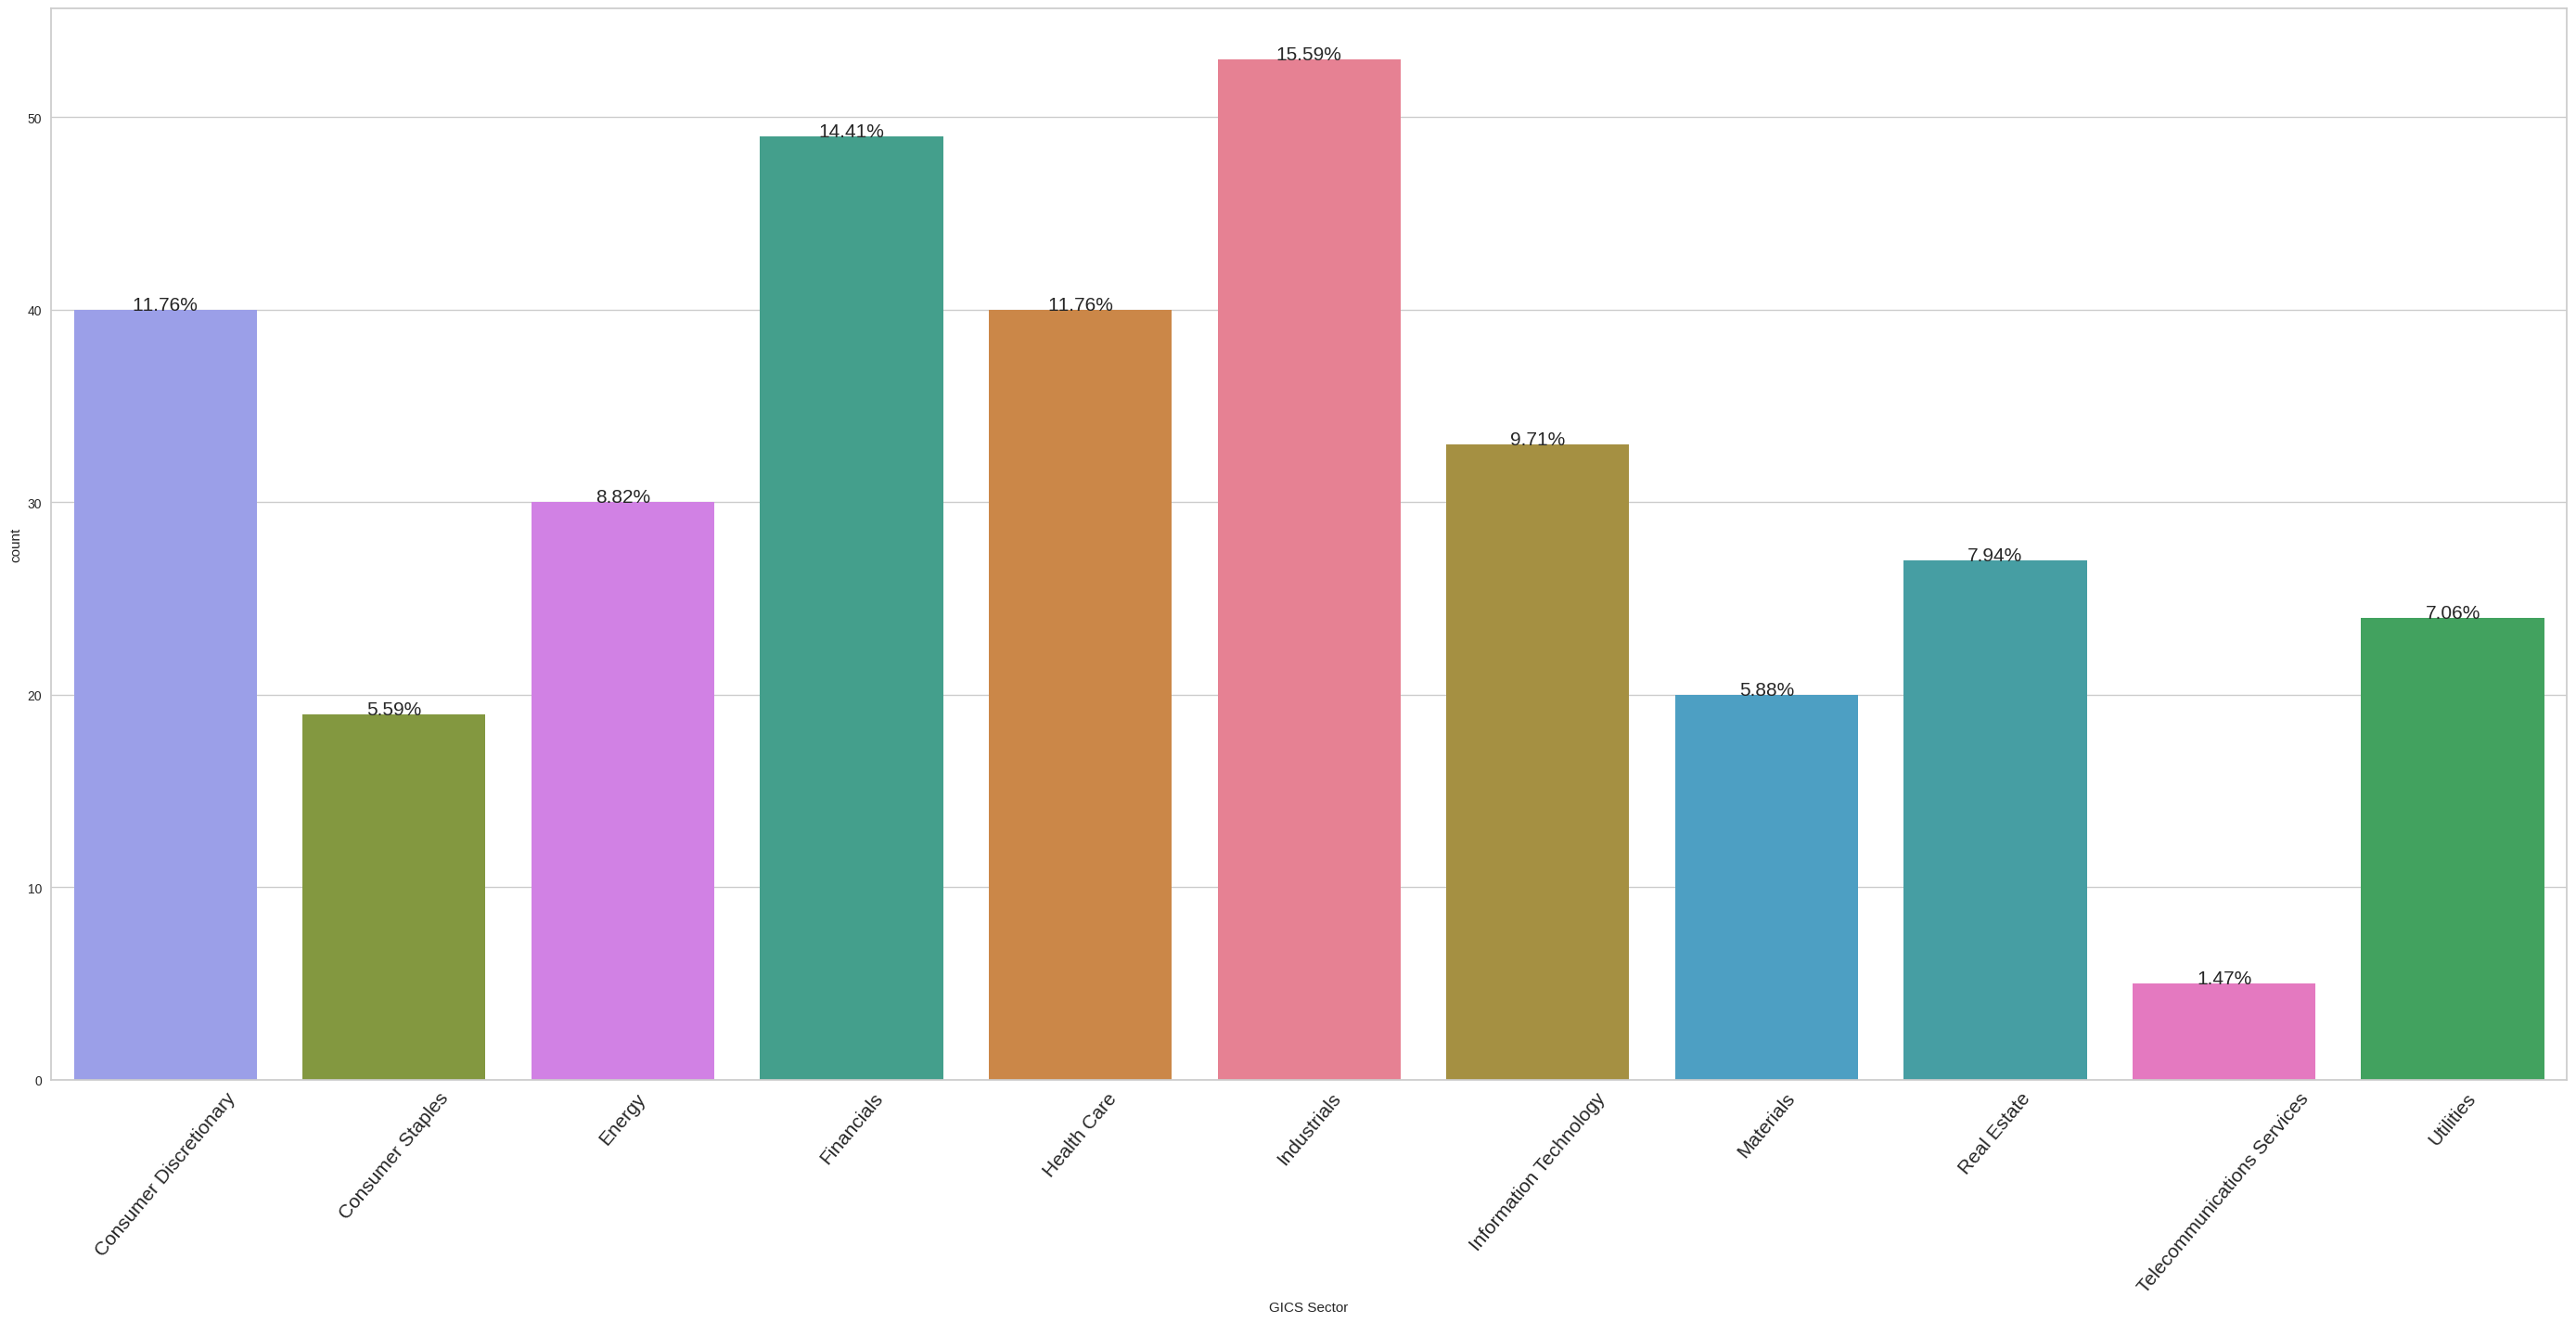

In [15]:
plot_countplot("GICS Sector", perc=True, rotation=50)

* The top 4 Sectors from where the Industrials, Financials, Consumer Discretionary, HealthCare.
* Least preferred Sectors are Telecommunication Services and Consumer Staples

#### GICS Sub Industry

In [16]:
plot_countplot("GICS Sub Industry", perc=True, rotation=90, fig_size=(150,50), font_size=50)

Output hidden; open in https://colab.research.google.com to view.

The data highlights the distribution of stocks across various GICS Sub-Industries, showing that some sub-industries, such as "Software" or "Pharmaceuticals," have significantly more stocks, indicating their dominance in the market. Sub-industries with fewer stocks, on the other hand, suggest niche or less-represented areas that may offer unique investment opportunities but could carry higher risks.

### Numerical Variables

In [17]:
num_cols = data.select_dtypes(include="number").columns
num_cols

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

#### Current Price

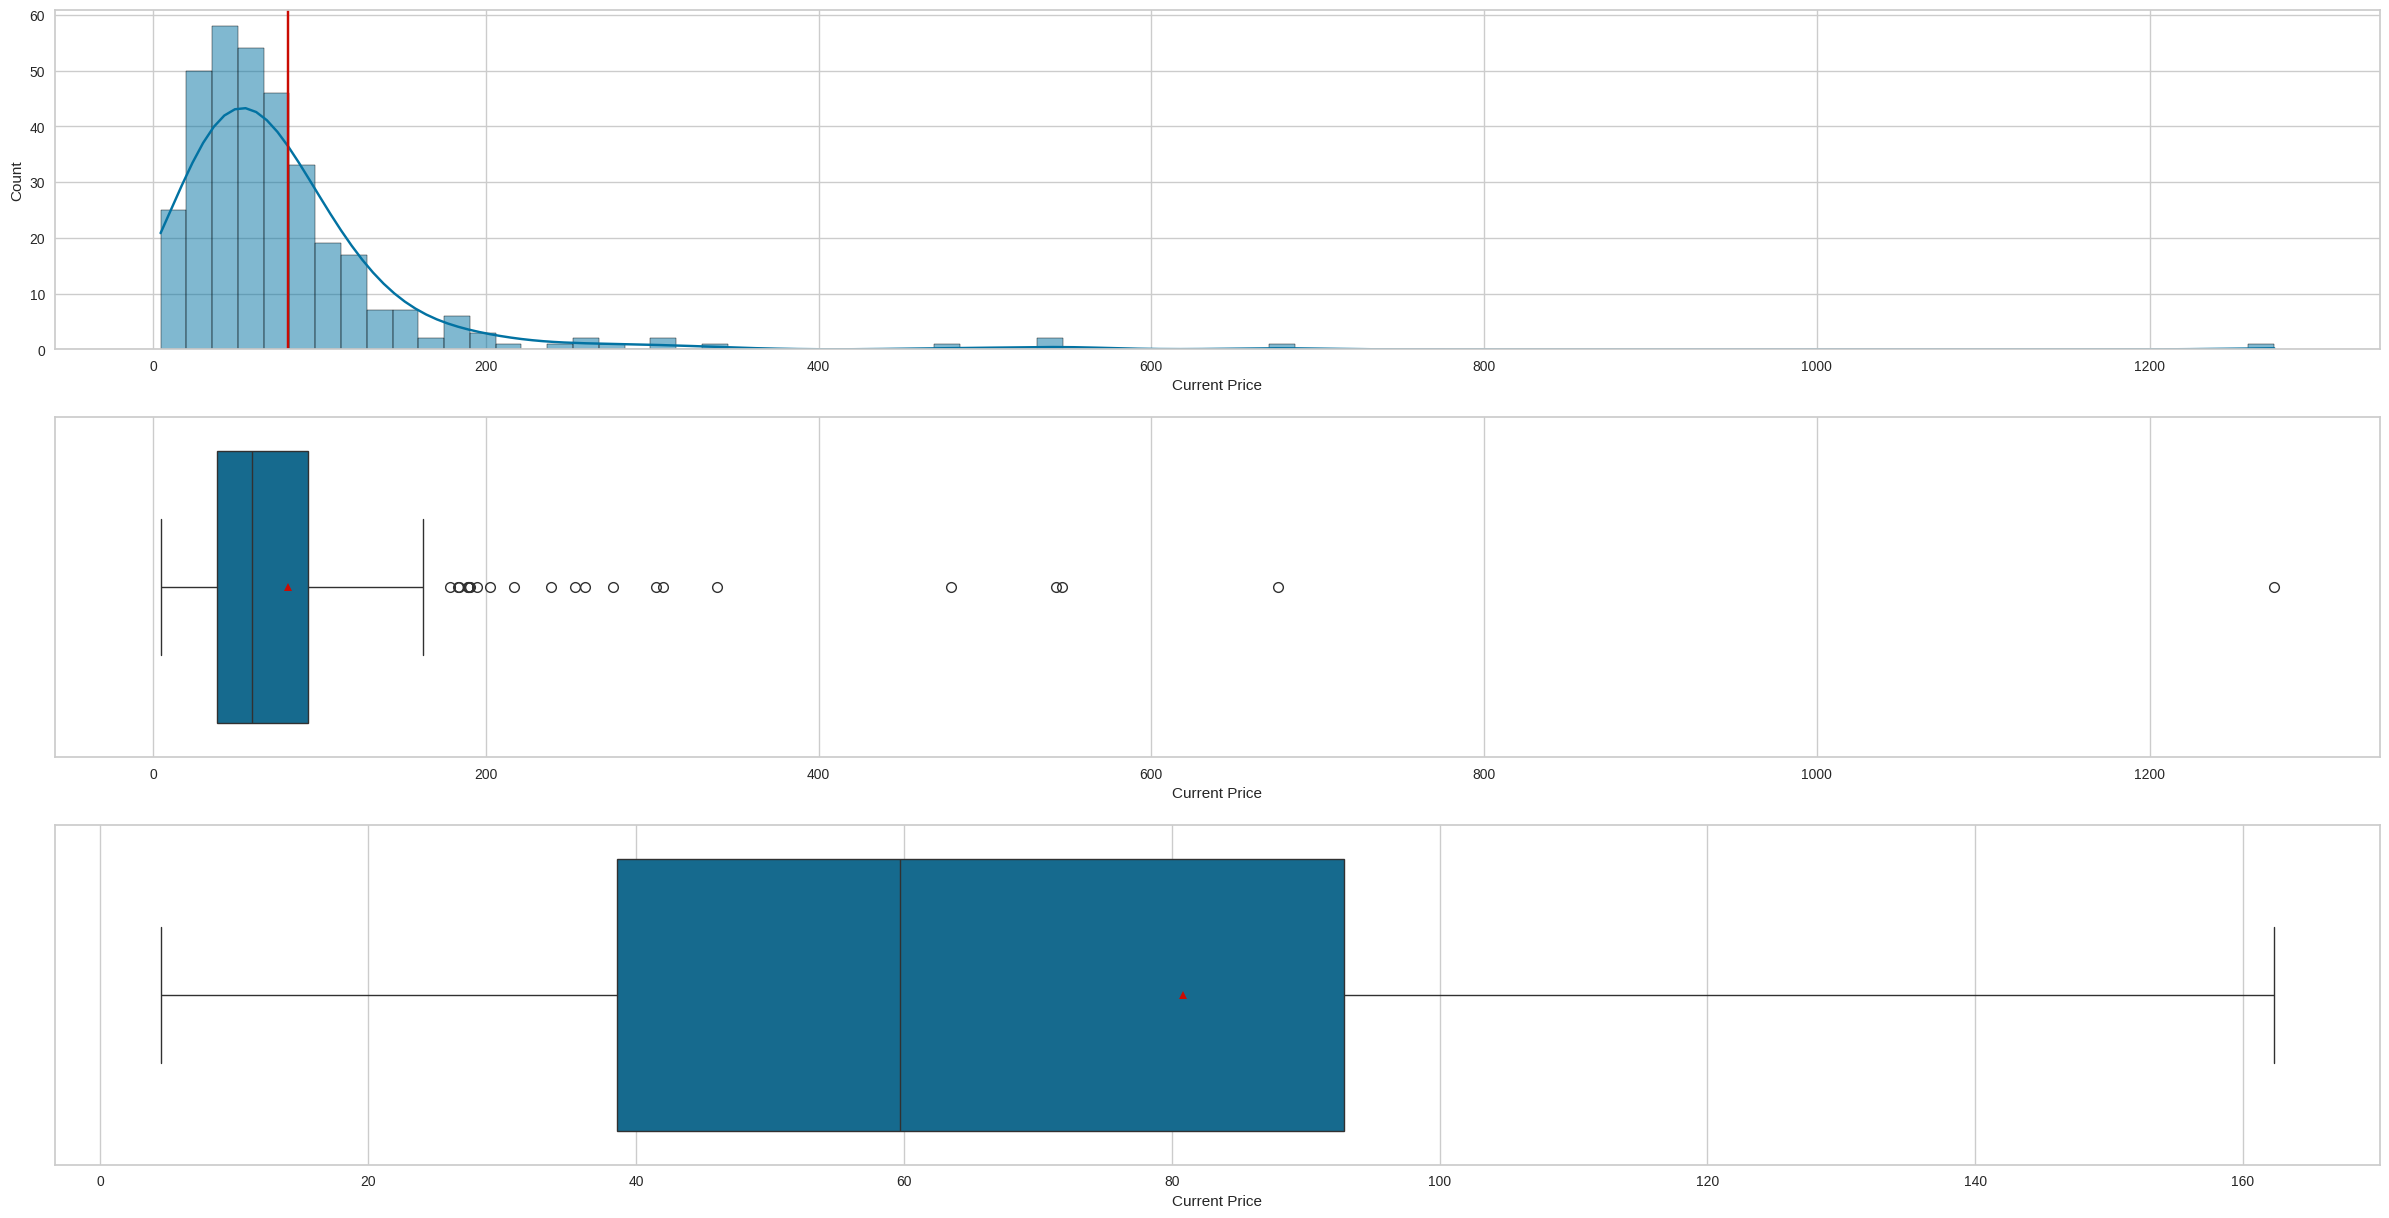

In [18]:
plot_histogram_countplot_boxplot(col_name="Current Price", histplot=True)

* The distribution is highly right skewed indicating that the prices range on the lower side of the spectrum.
* The outliers lie on the larger side of the spectrum indicating very few stocks are priced at a higher value.

#### Price Change

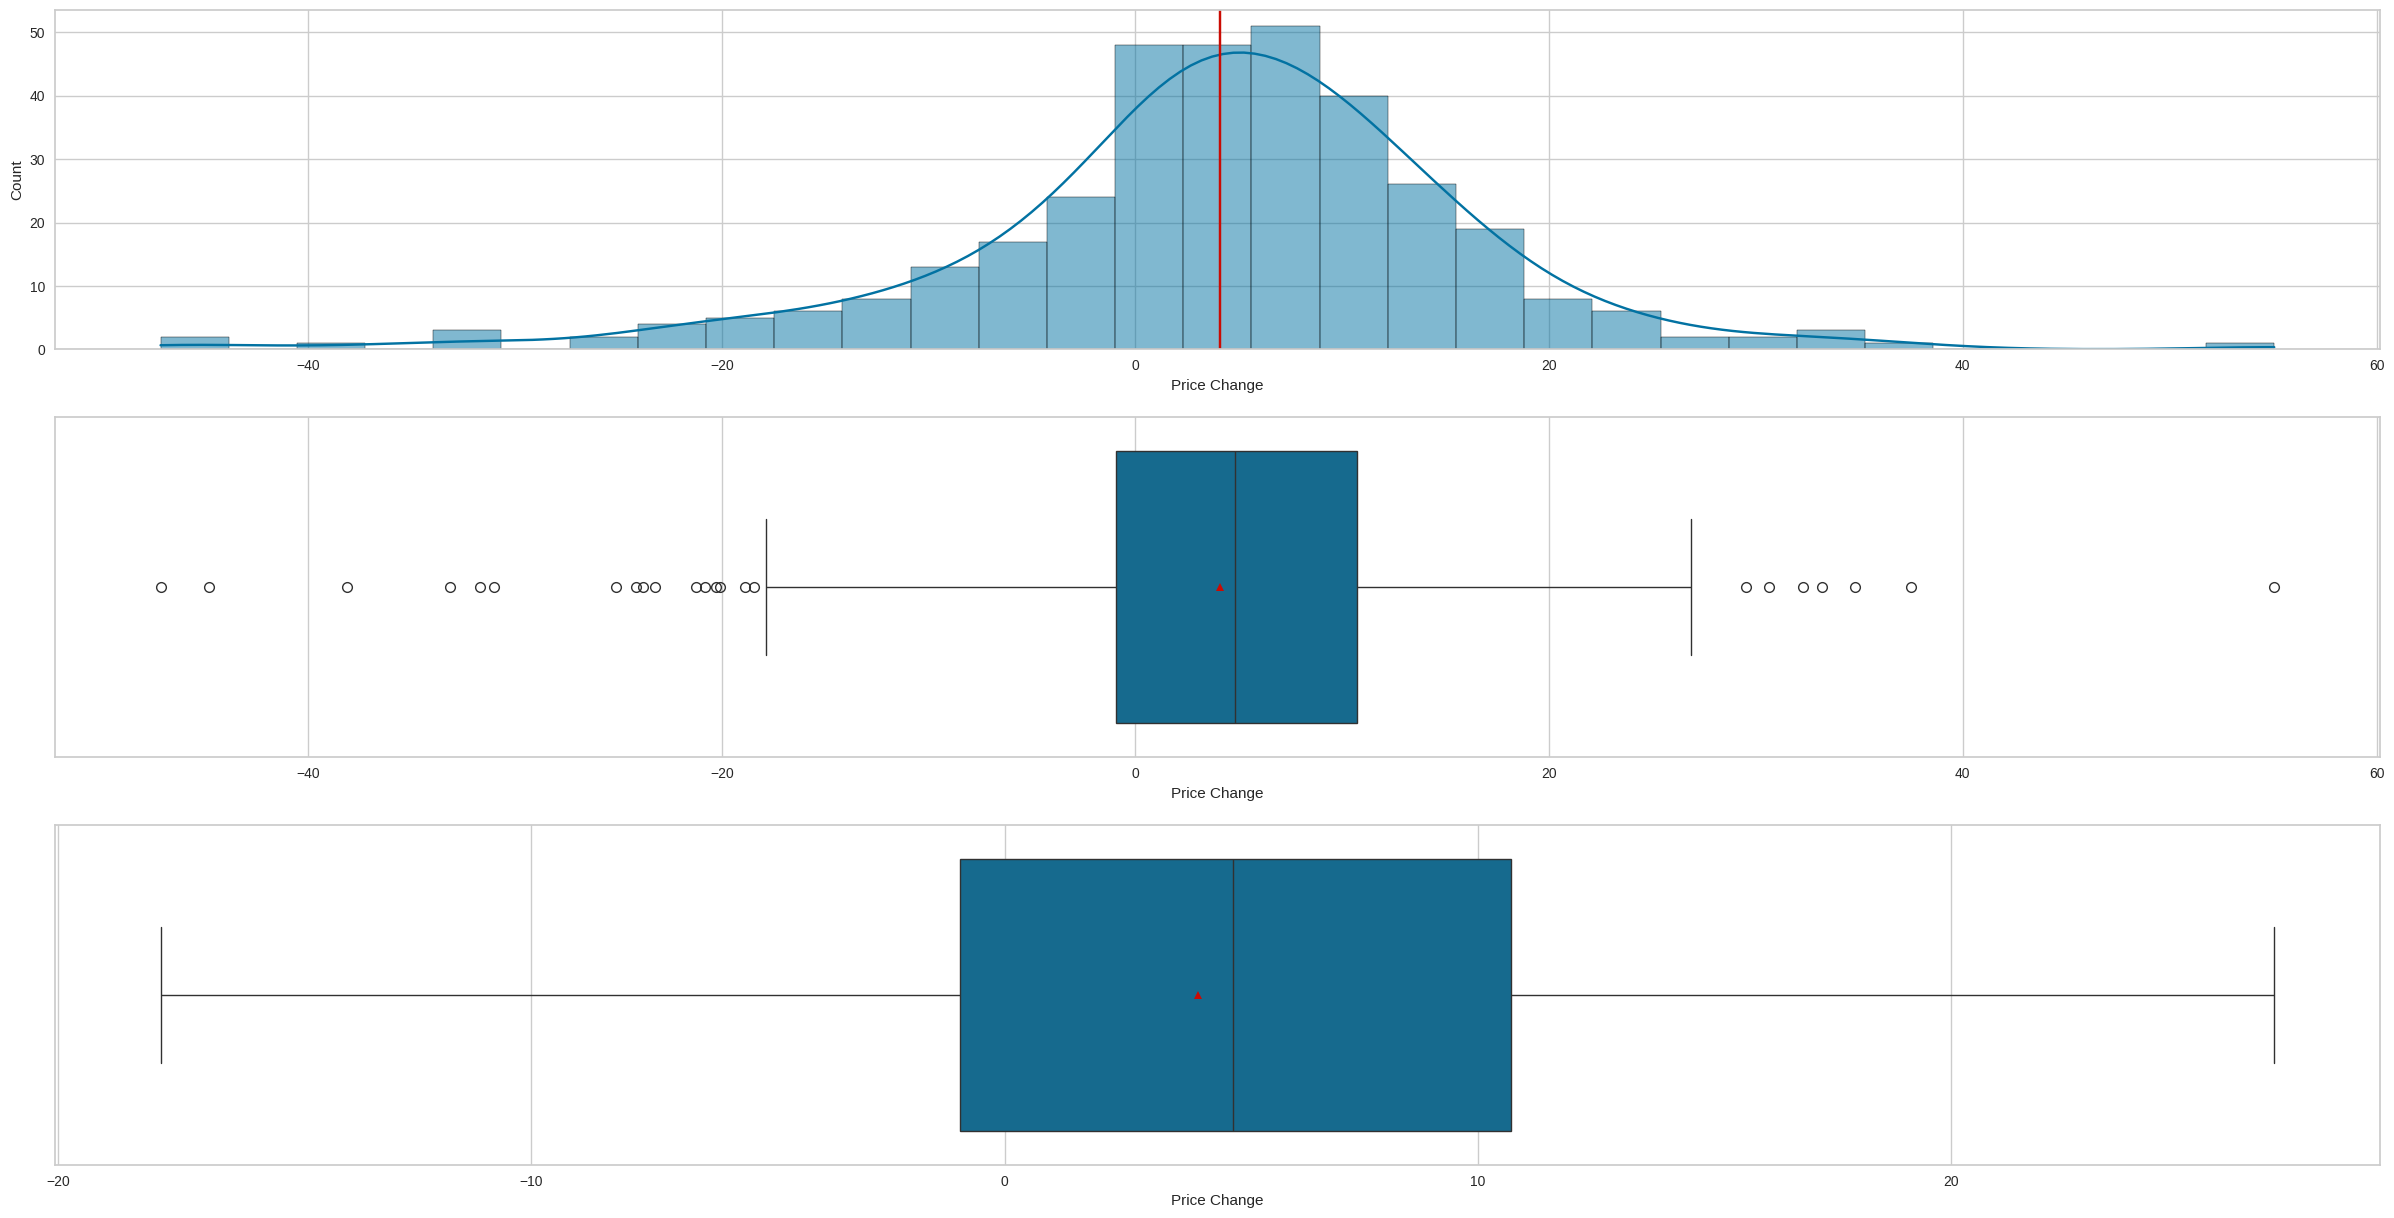

In [19]:
plot_histogram_countplot_boxplot(col_name="Price Change", histplot=True)

As seen from the above graph, The Price Change follows a normal distribution indicating that prices of **majority of the stocks** do not change and vary from -1 to 11.  

#### Volatility

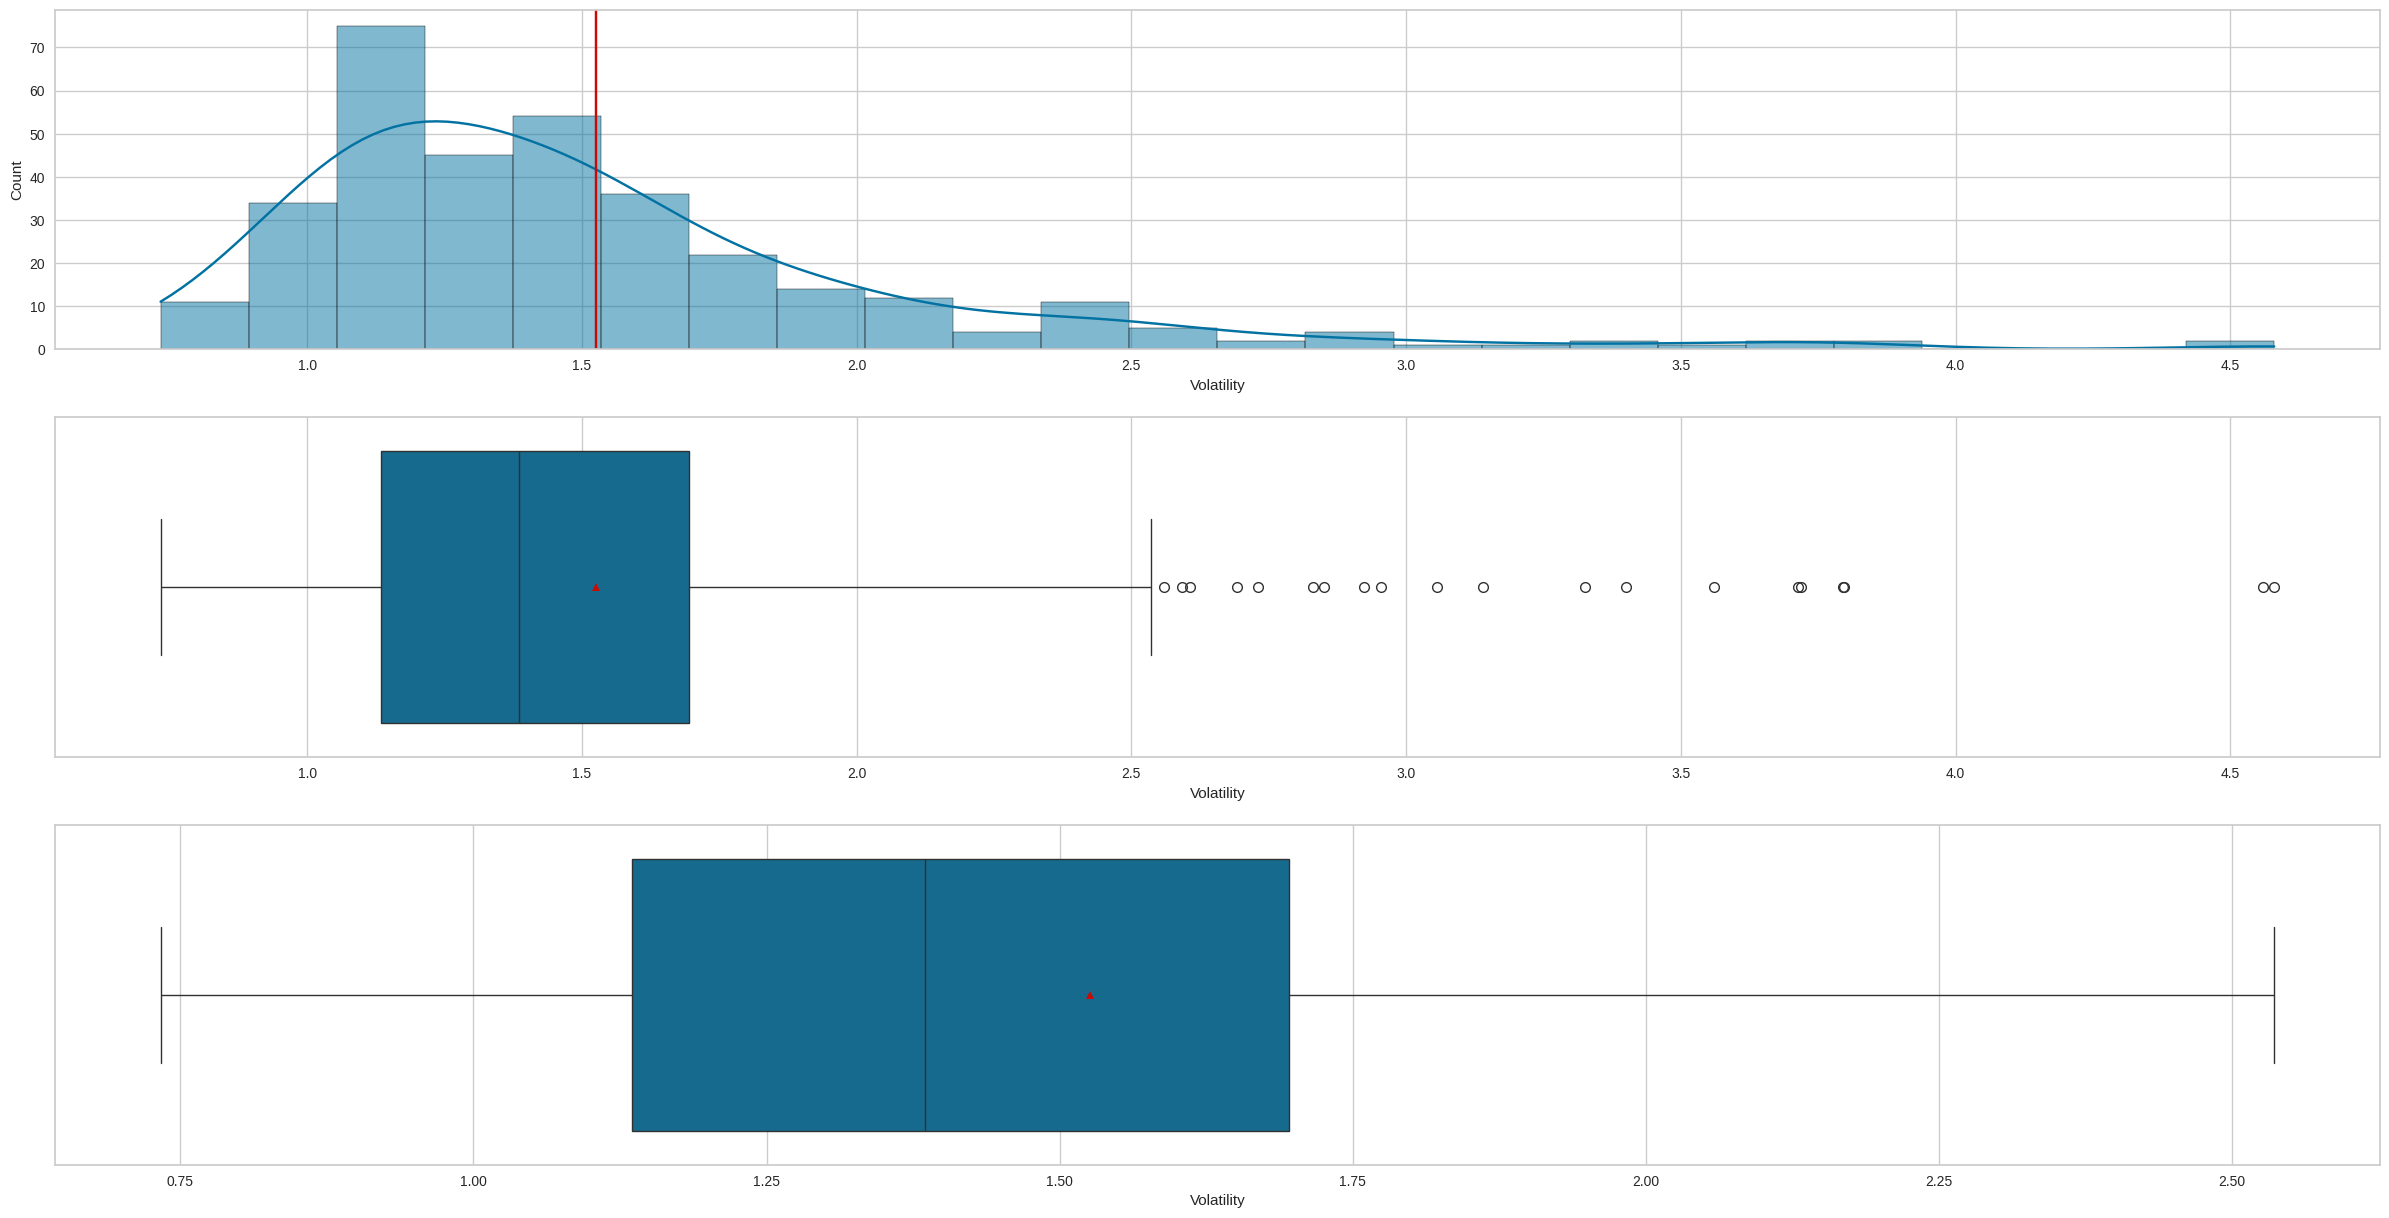

In [20]:
plot_histogram_countplot_boxplot(col_name="Volatility", histplot=True)

The distribution is right skewed indicating that volatility/standard deviation for many of stock prices range between 0 and 2.5.

#### ROE

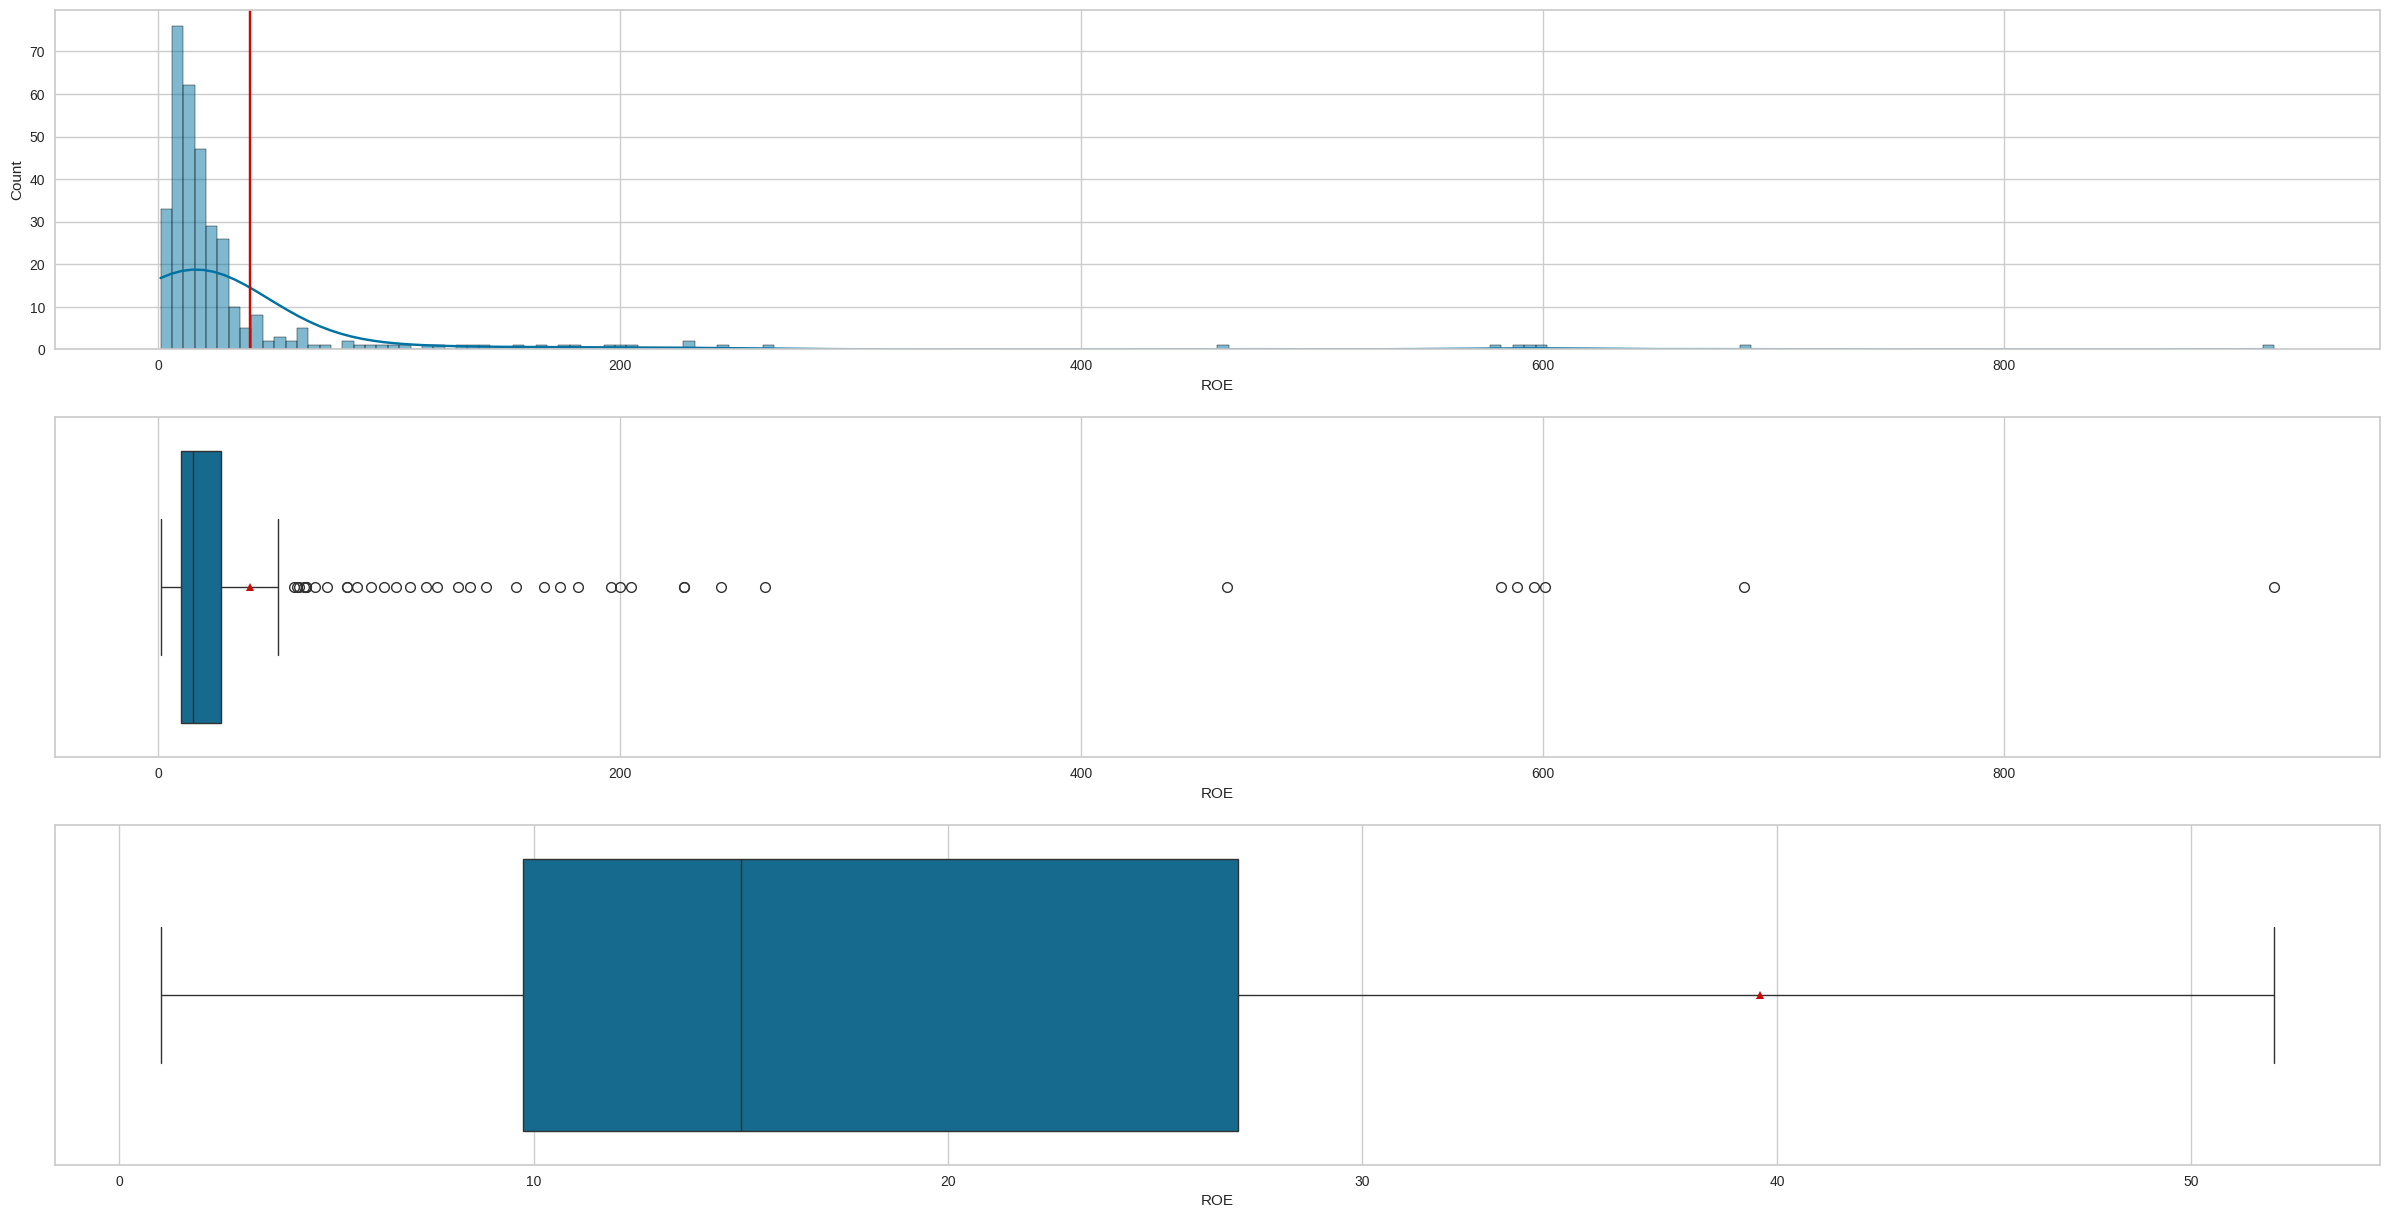

In [21]:
plot_histogram_countplot_boxplot(col_name="ROE", histplot=True)

The distribution is highly right skewed distribution showing that the shareholder have lower Return on Equity for almost 55 stocks. Whereas there are a few outliers which have very high return on equity.

#### Cash Ratio

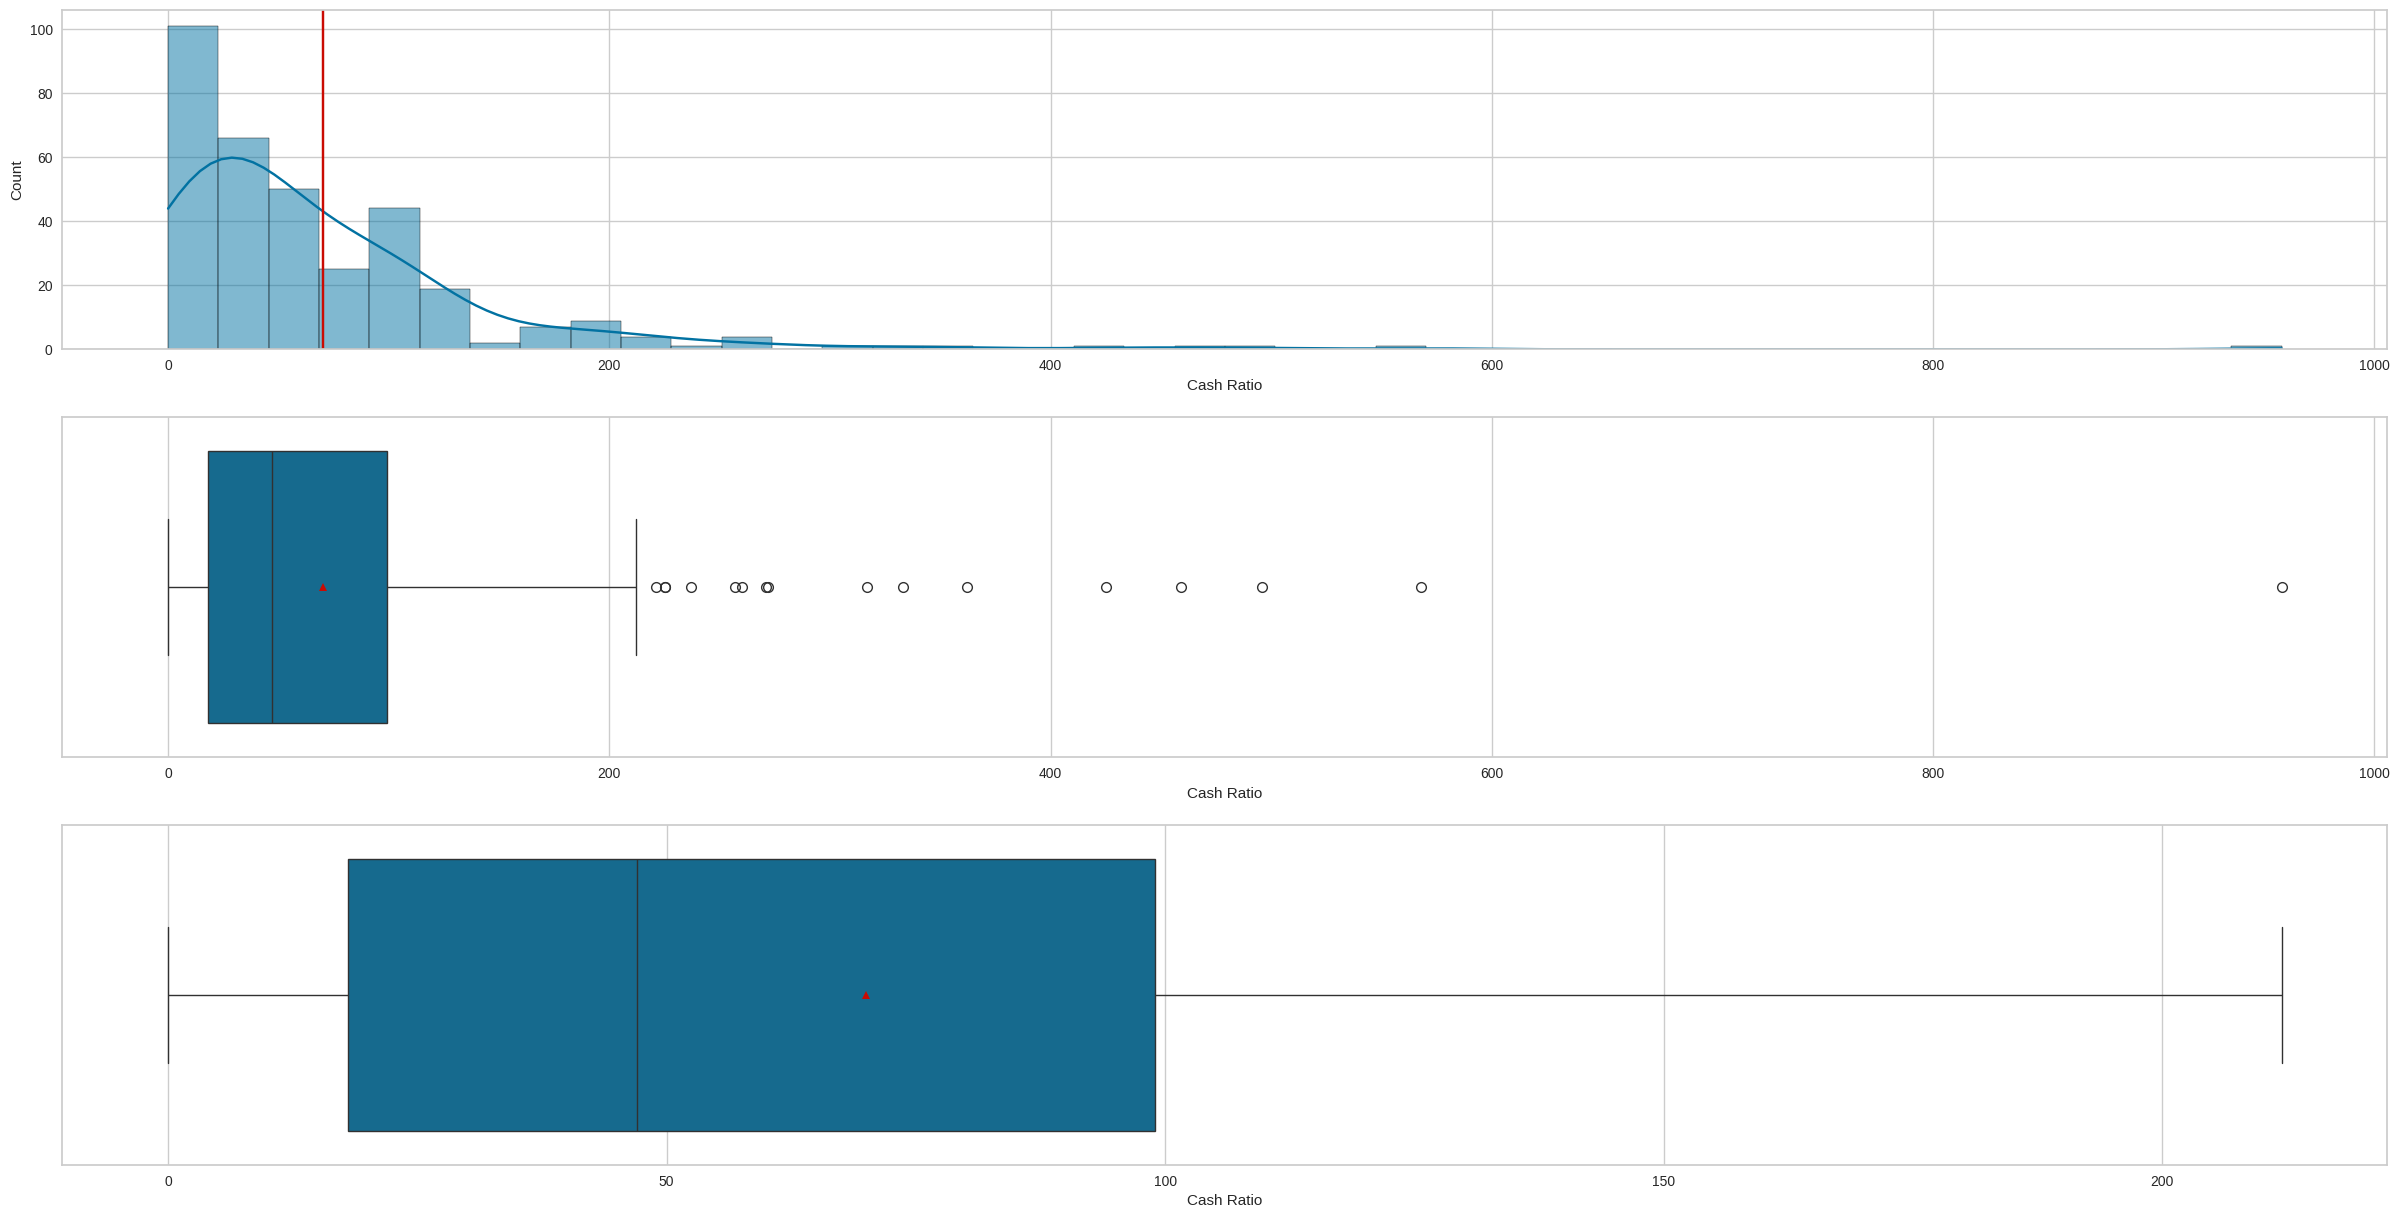

In [22]:
plot_histogram_countplot_boxplot(col_name="Cash Ratio", histplot=True)

The Cash Ratio for many stocks is higher indicating that many stocks are very stable in the their financials. Right-Skewed Distribution also shows that as the Cash ratio increases, the number of stocks also decreases with very less outlier indicating a lot of stocks are very reliable

#### Net Cash Flow

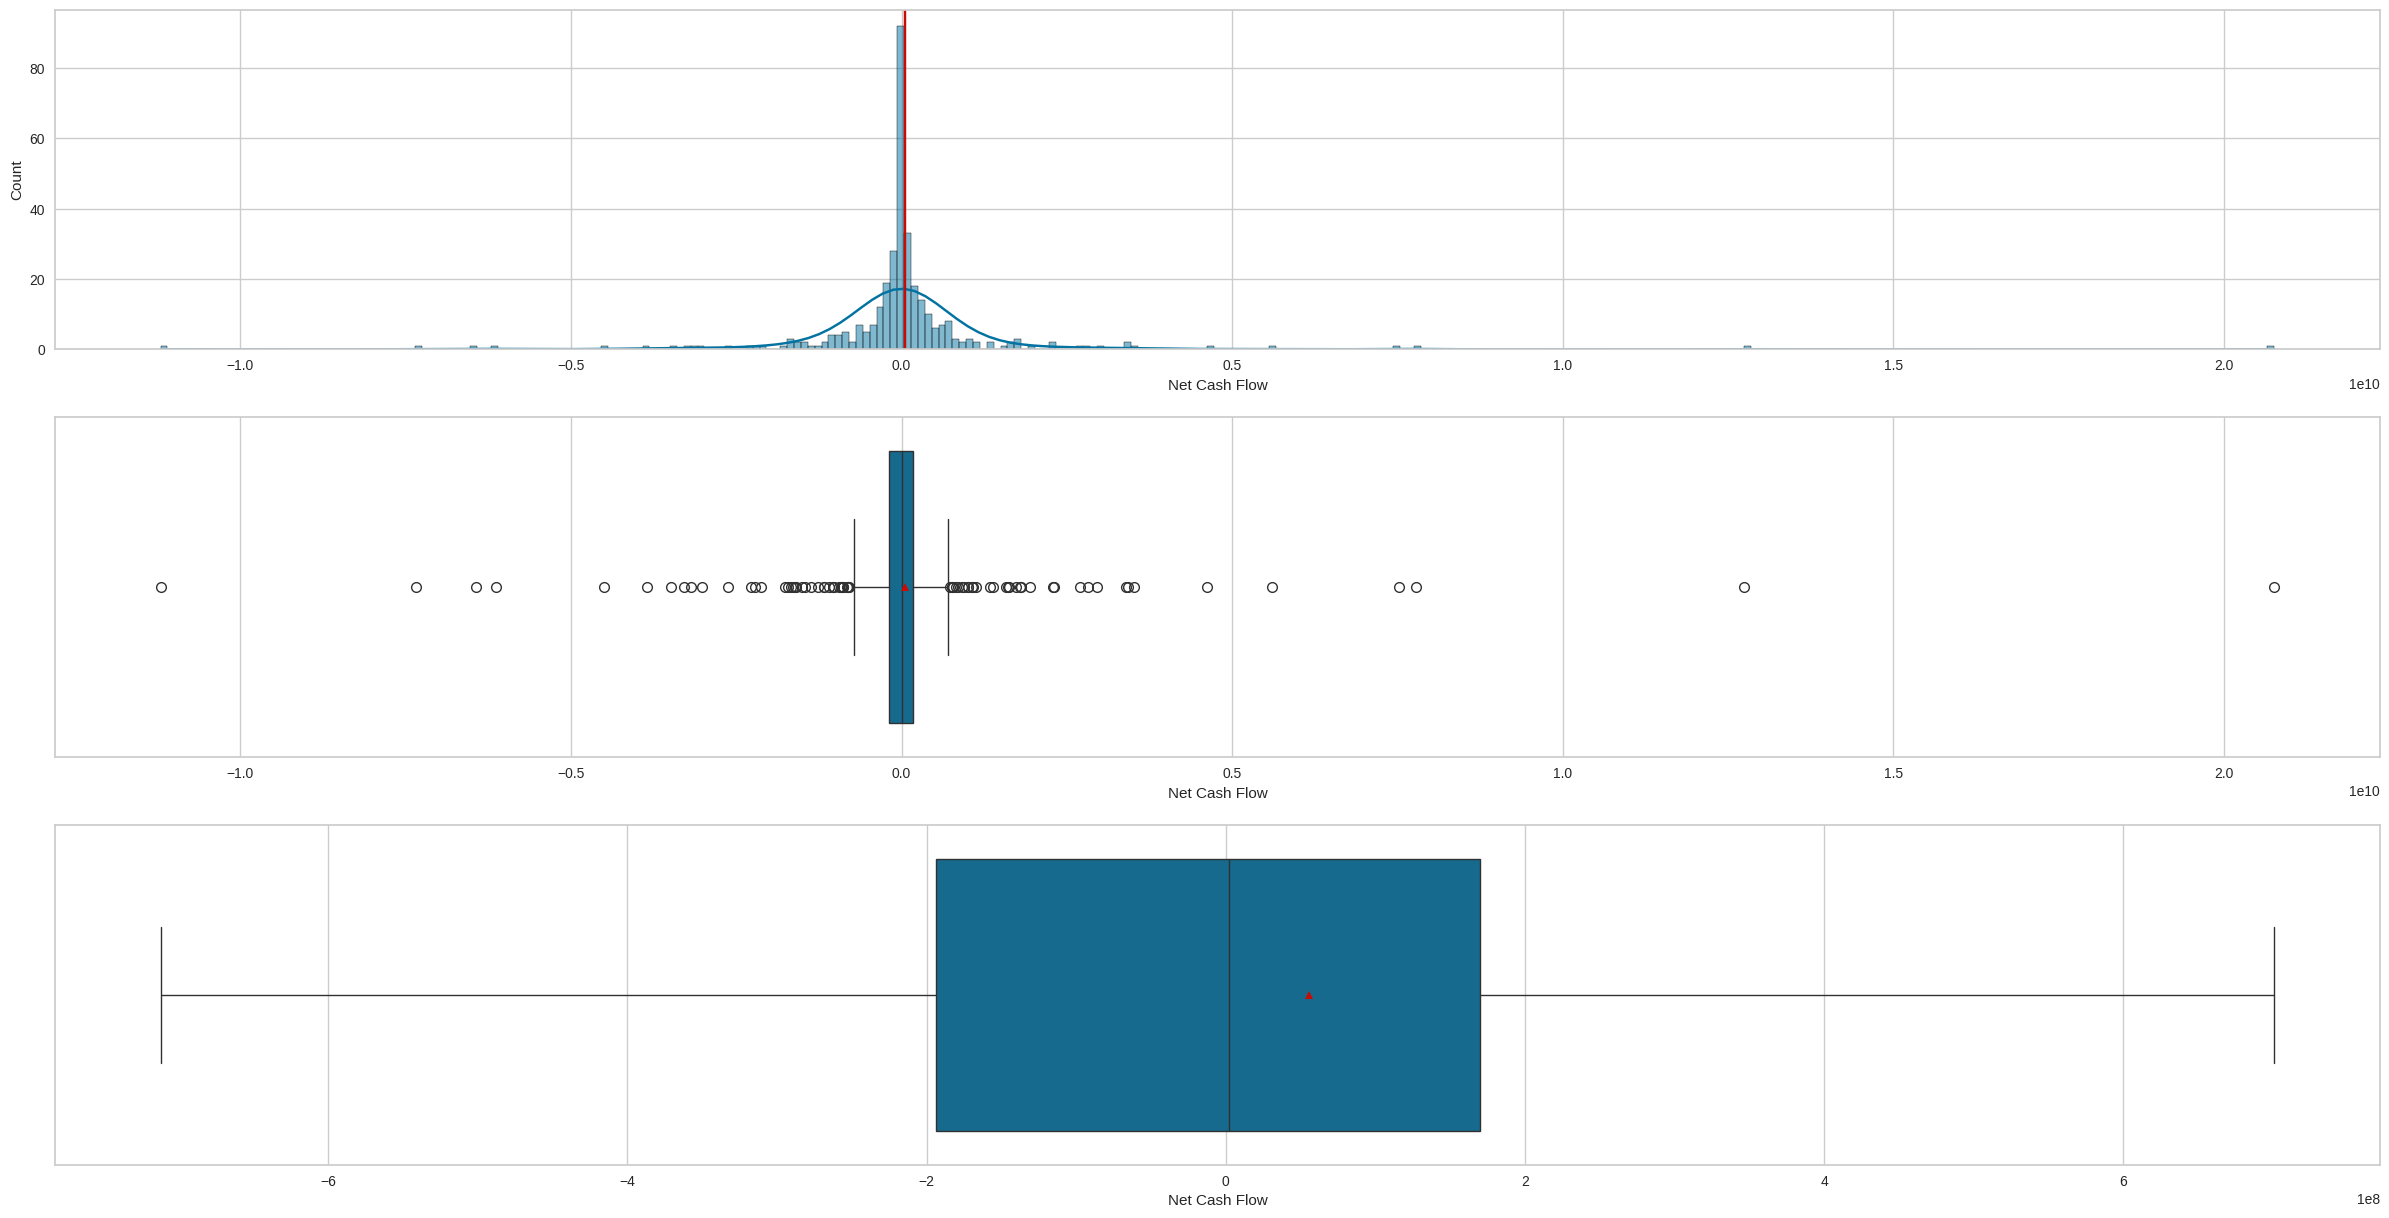

In [23]:
plot_histogram_countplot_boxplot(col_name="Net Cash Flow", histplot=True)

Net Cash Flow follows a normal distribution indicating that majority of the net cash flow is around the center of the distribution(at 0), hence we can imply that many stocks do not have very good net cash flow.

#### Net Income

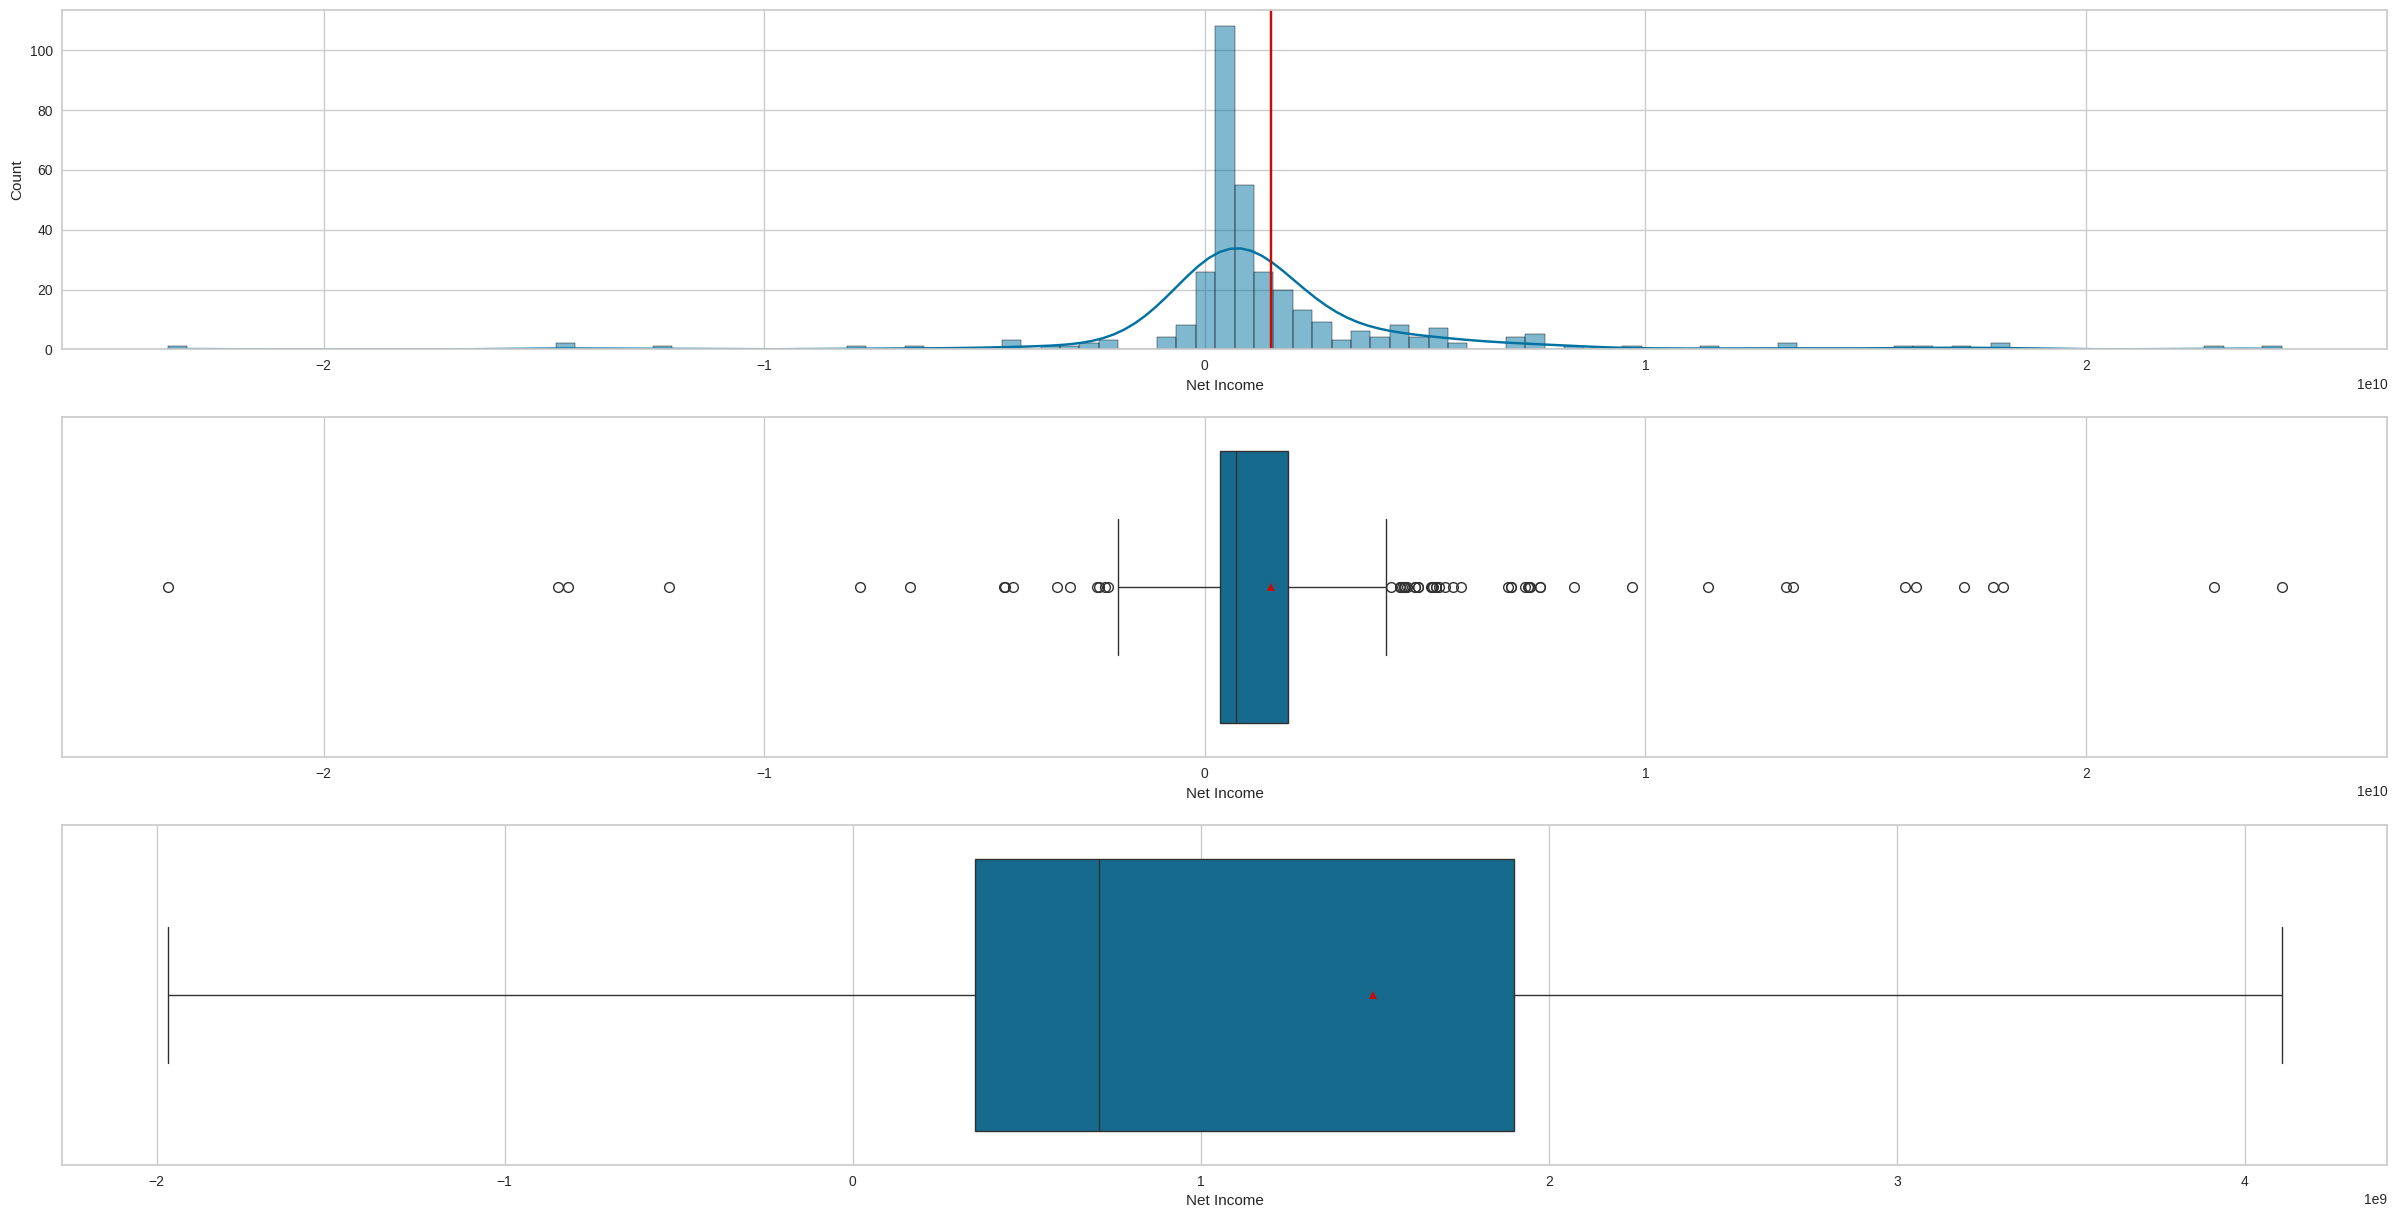

In [24]:
plot_histogram_countplot_boxplot(col_name="Net Income", histplot=True)

Net Income also follows a normal distribution however the median of the stocks are a little over *0* indicating that the majority of the stocks don't have 0 net income

#### Earnings Per Share

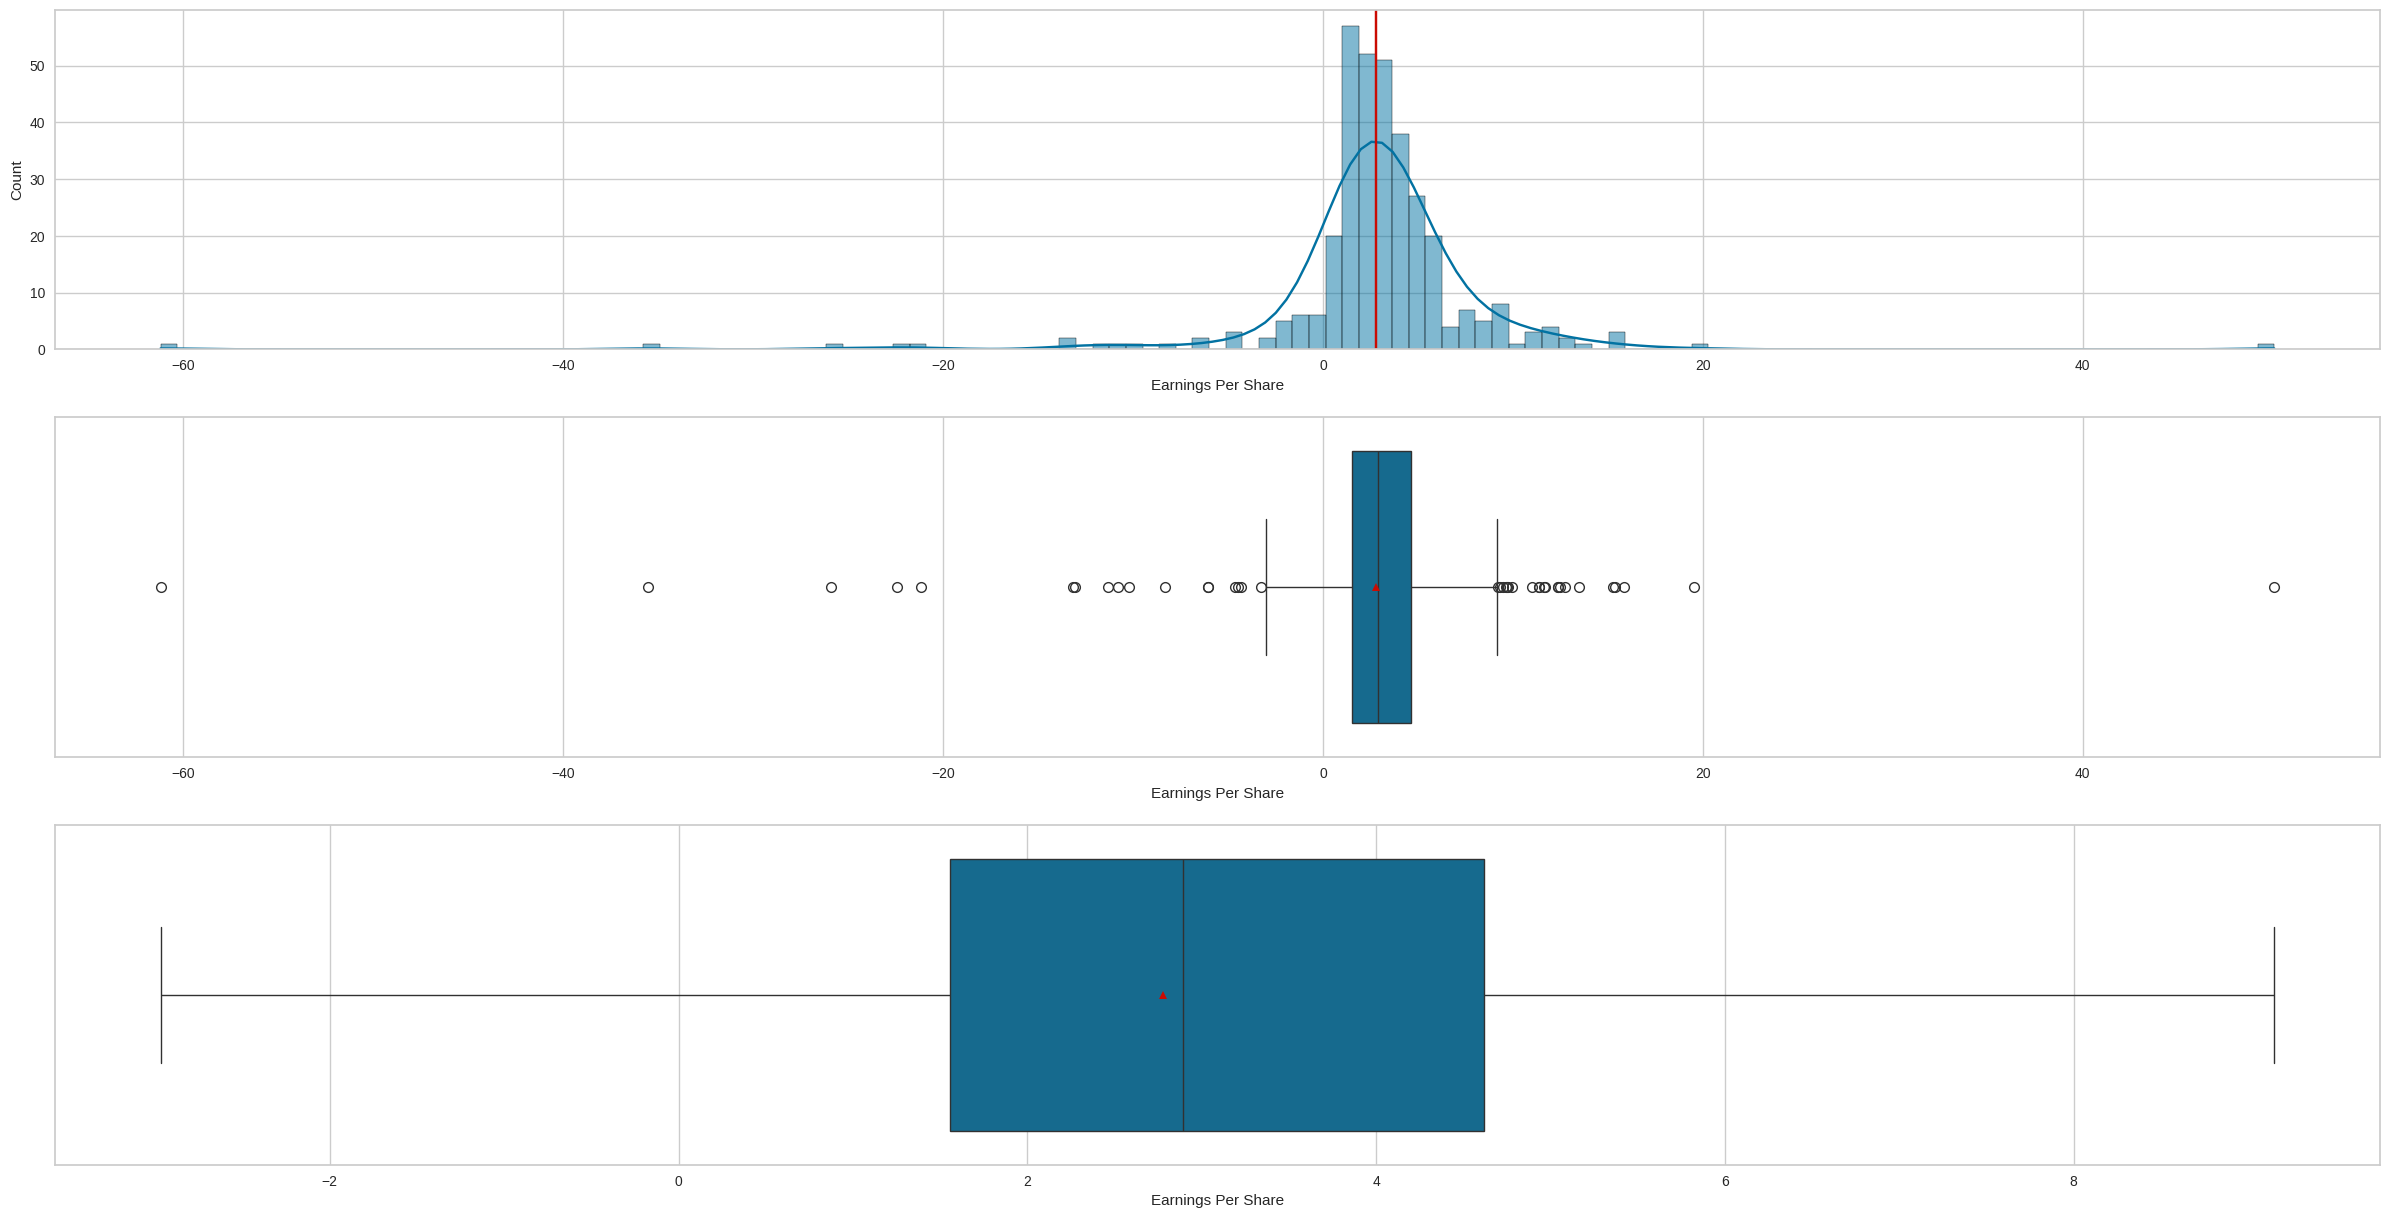

In [25]:
plot_histogram_countplot_boxplot(col_name="Earnings Per Share", histplot=True)

The data is concentrated around a positive range but has significant outliers on both the negative and positive ends. It is also following a somewhat normal distribution.


#### Estimated Shares Outstanding

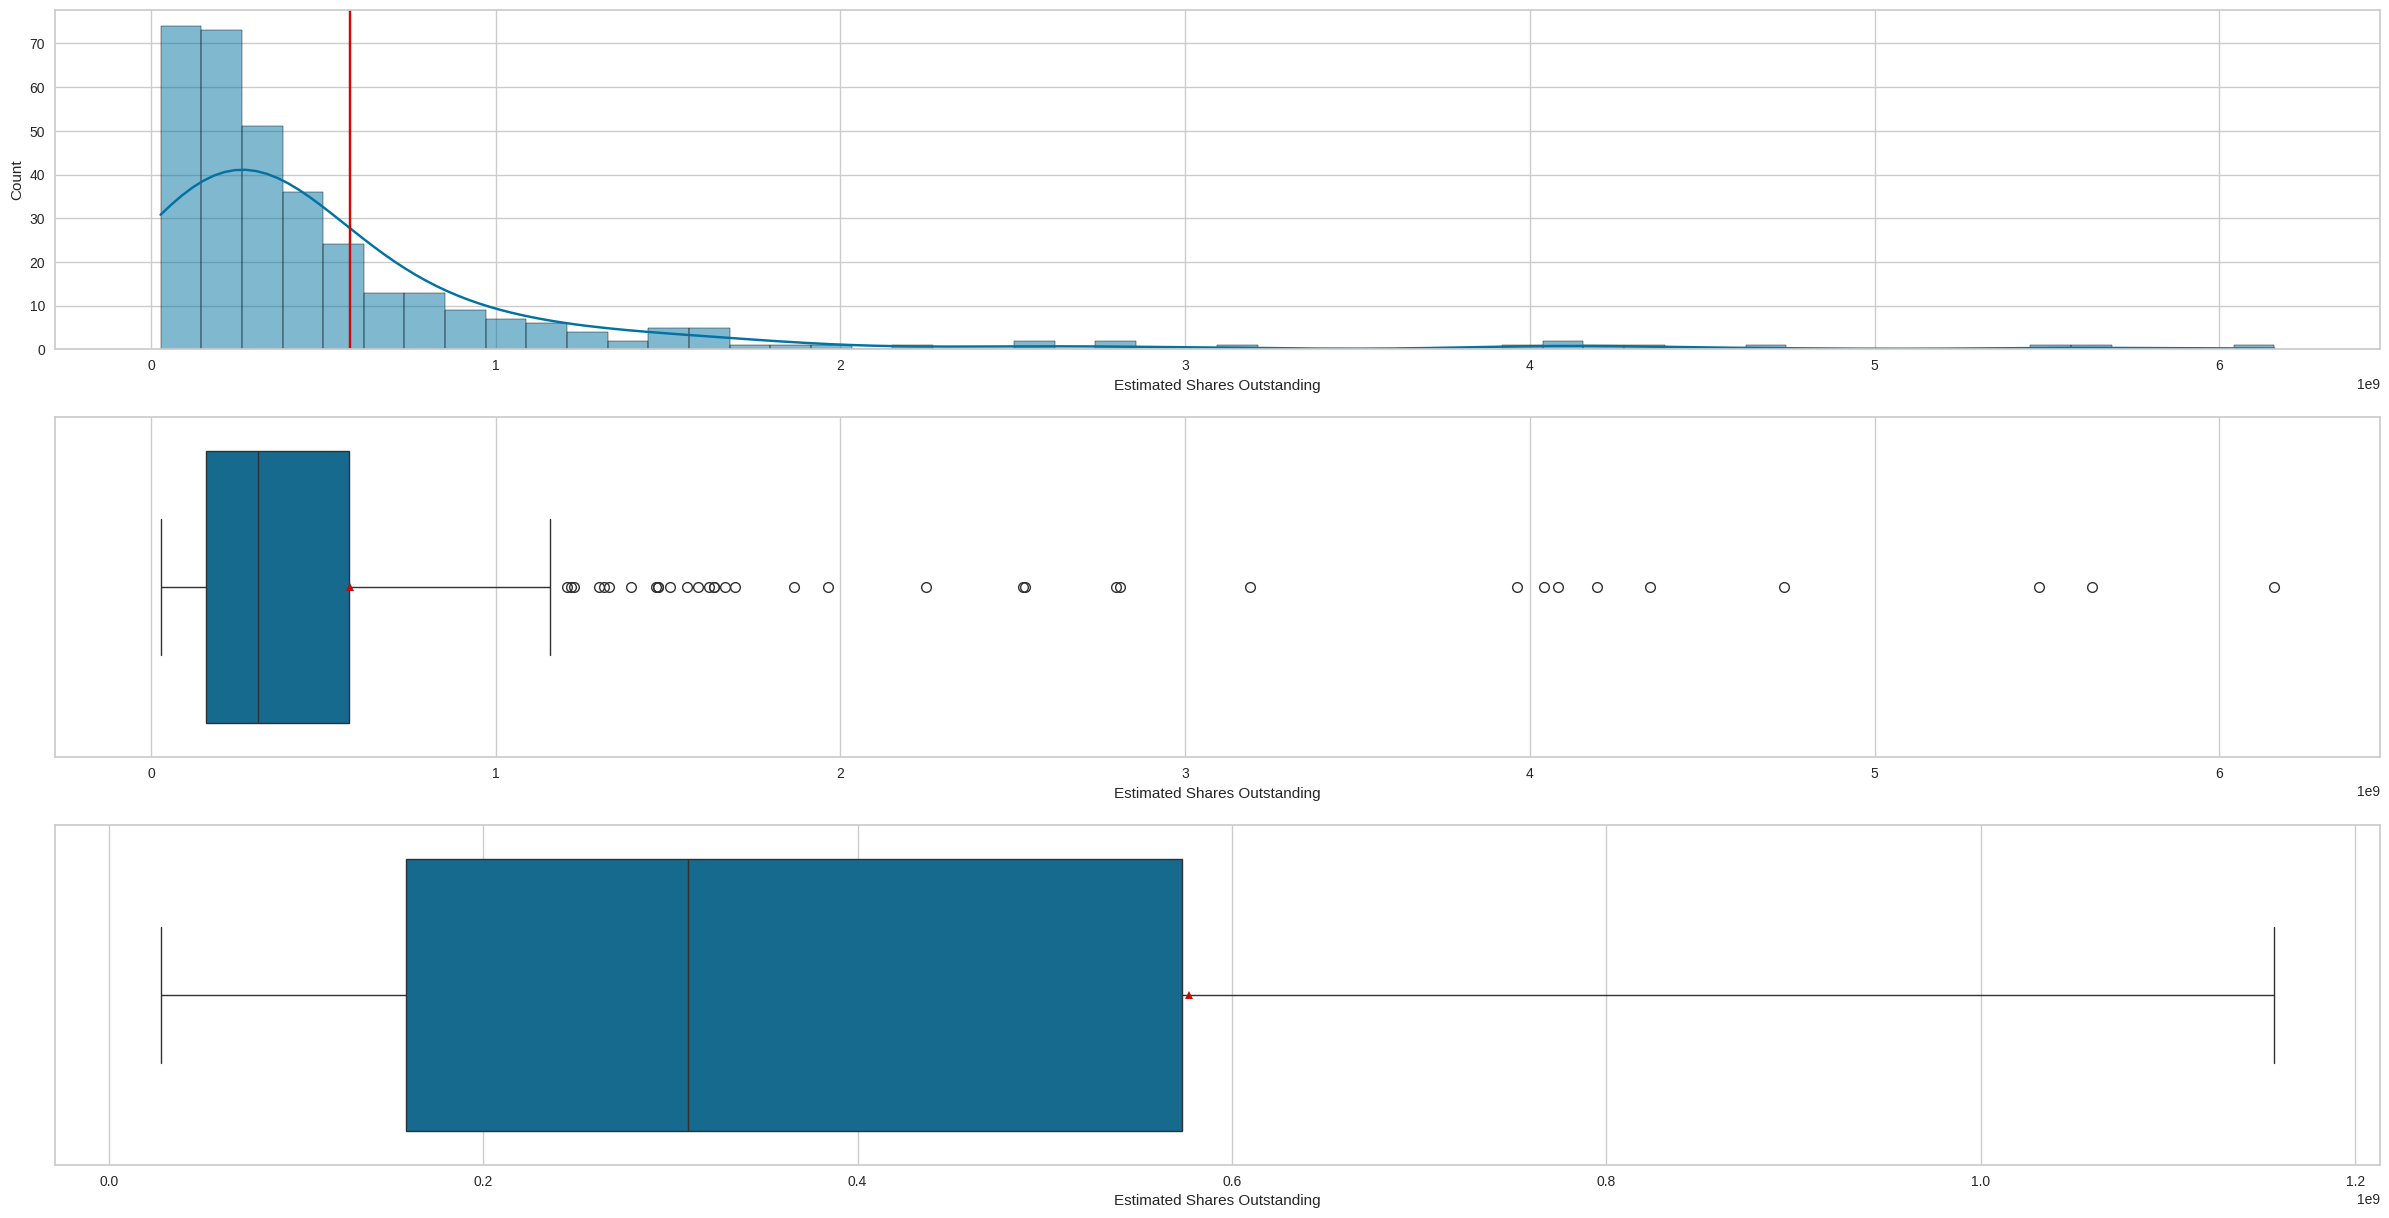

In [26]:
plot_histogram_countplot_boxplot(col_name="Estimated Shares Outstanding", histplot=True)

This distribution is highly right-skewed indicating majority of the stocks around 300 million with outliers having more than 1.2 billion shares in the market

#### P/E Ratio

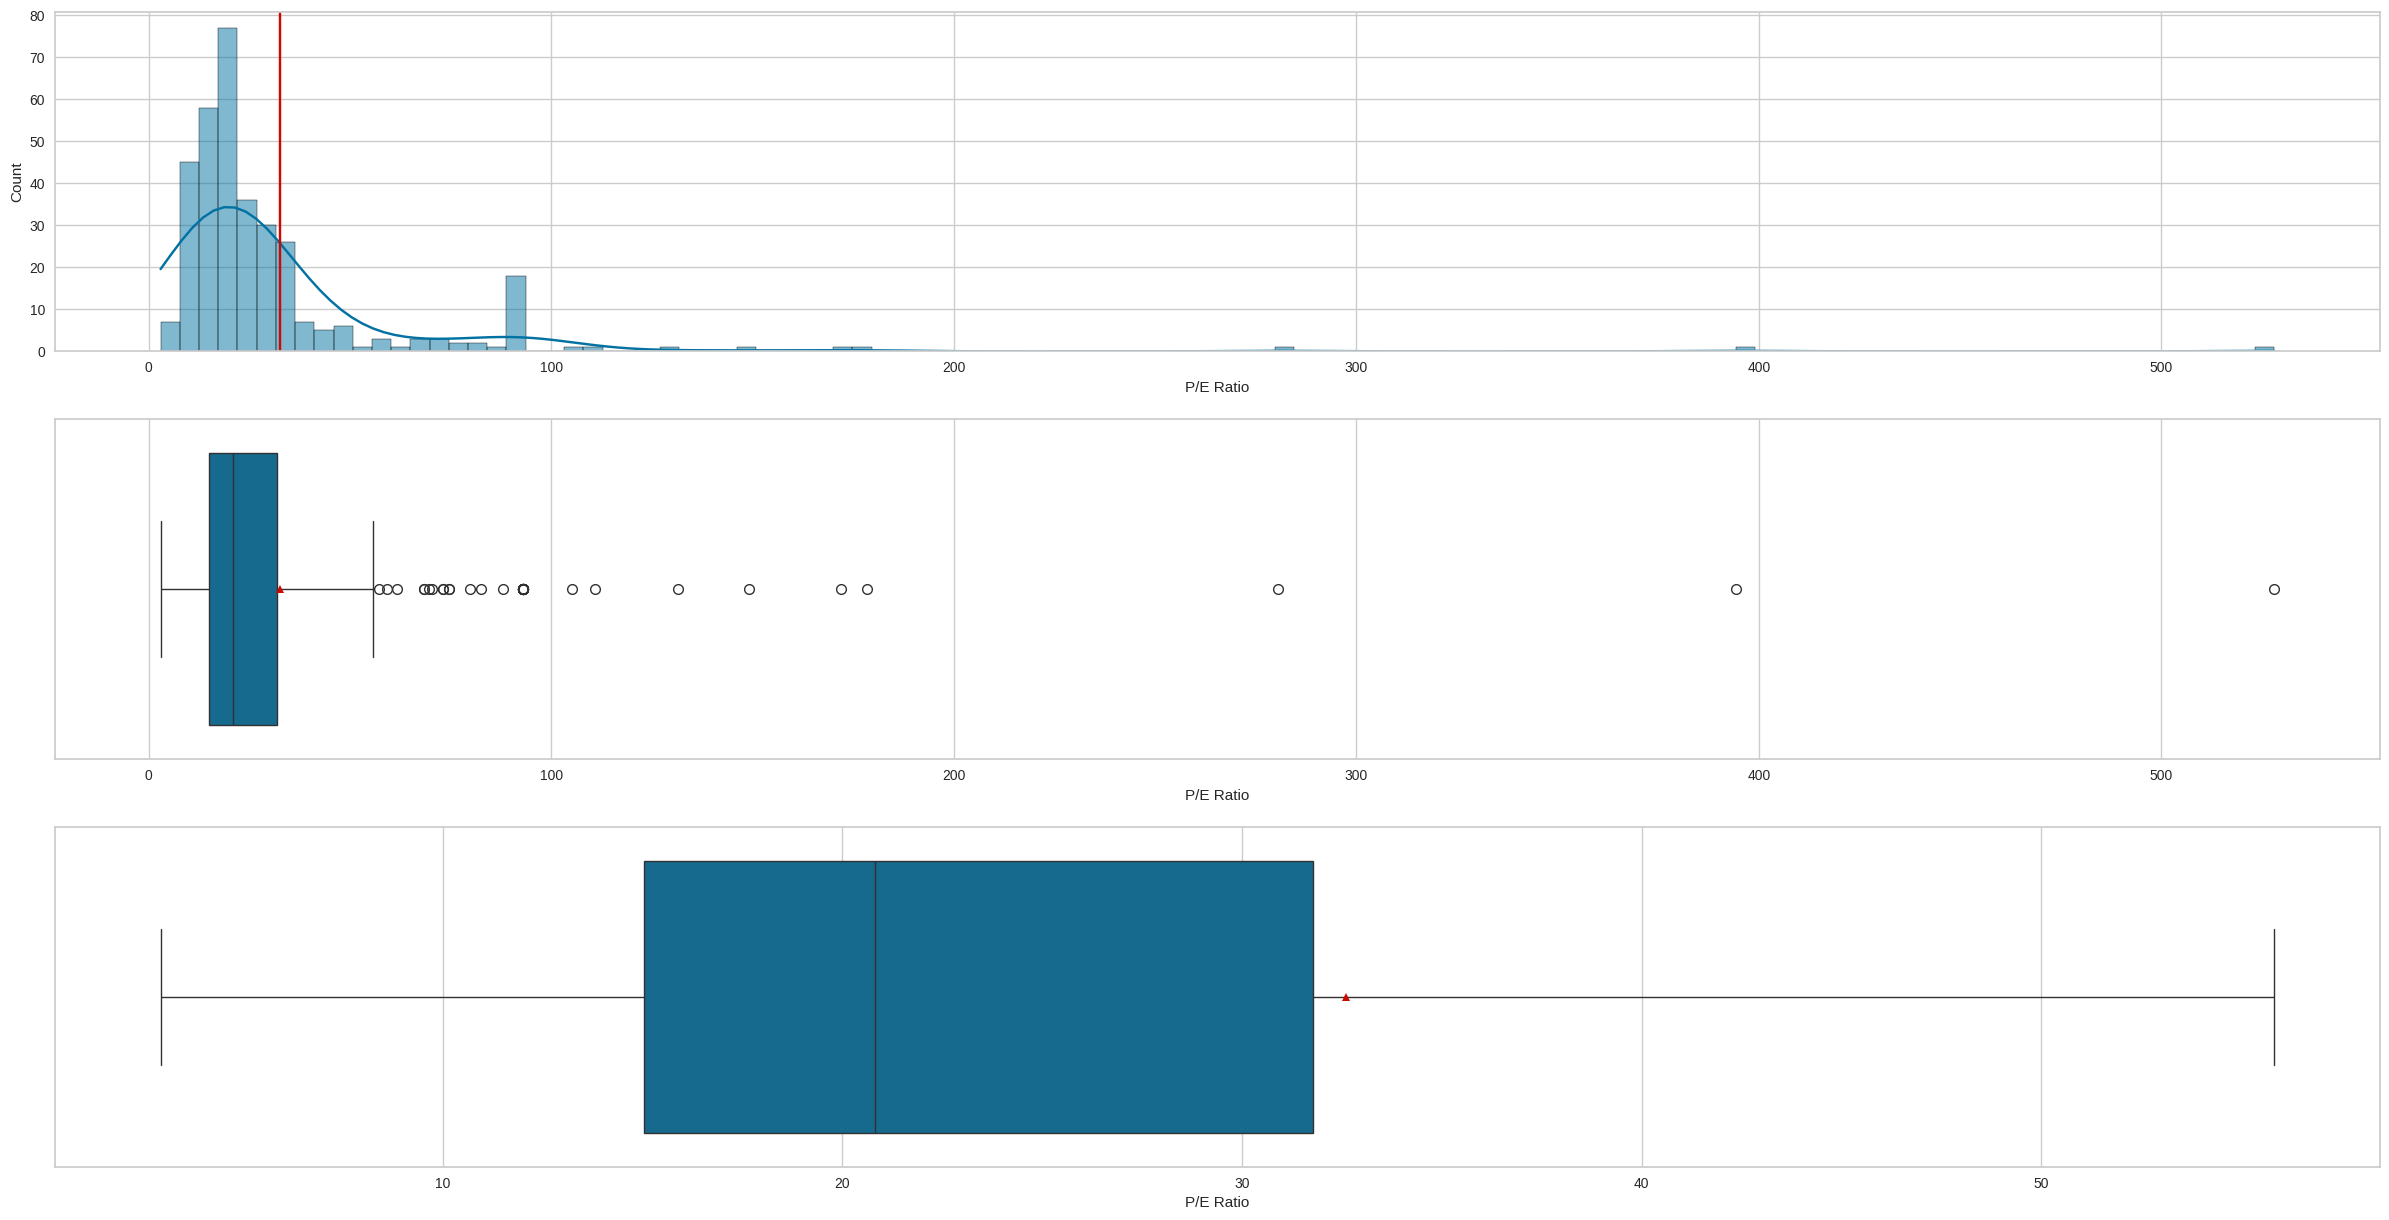

In [27]:
plot_histogram_countplot_boxplot(col_name="P/E Ratio", histplot=True)

The P/E ratio of majority of the stocks range from 1 to 55 which is known to range within this number. There are outliers which have a P/E ratio of greater than 55 which would mean that these stocks are overvalued due to higher P/E ratio

#### P/B Ratio

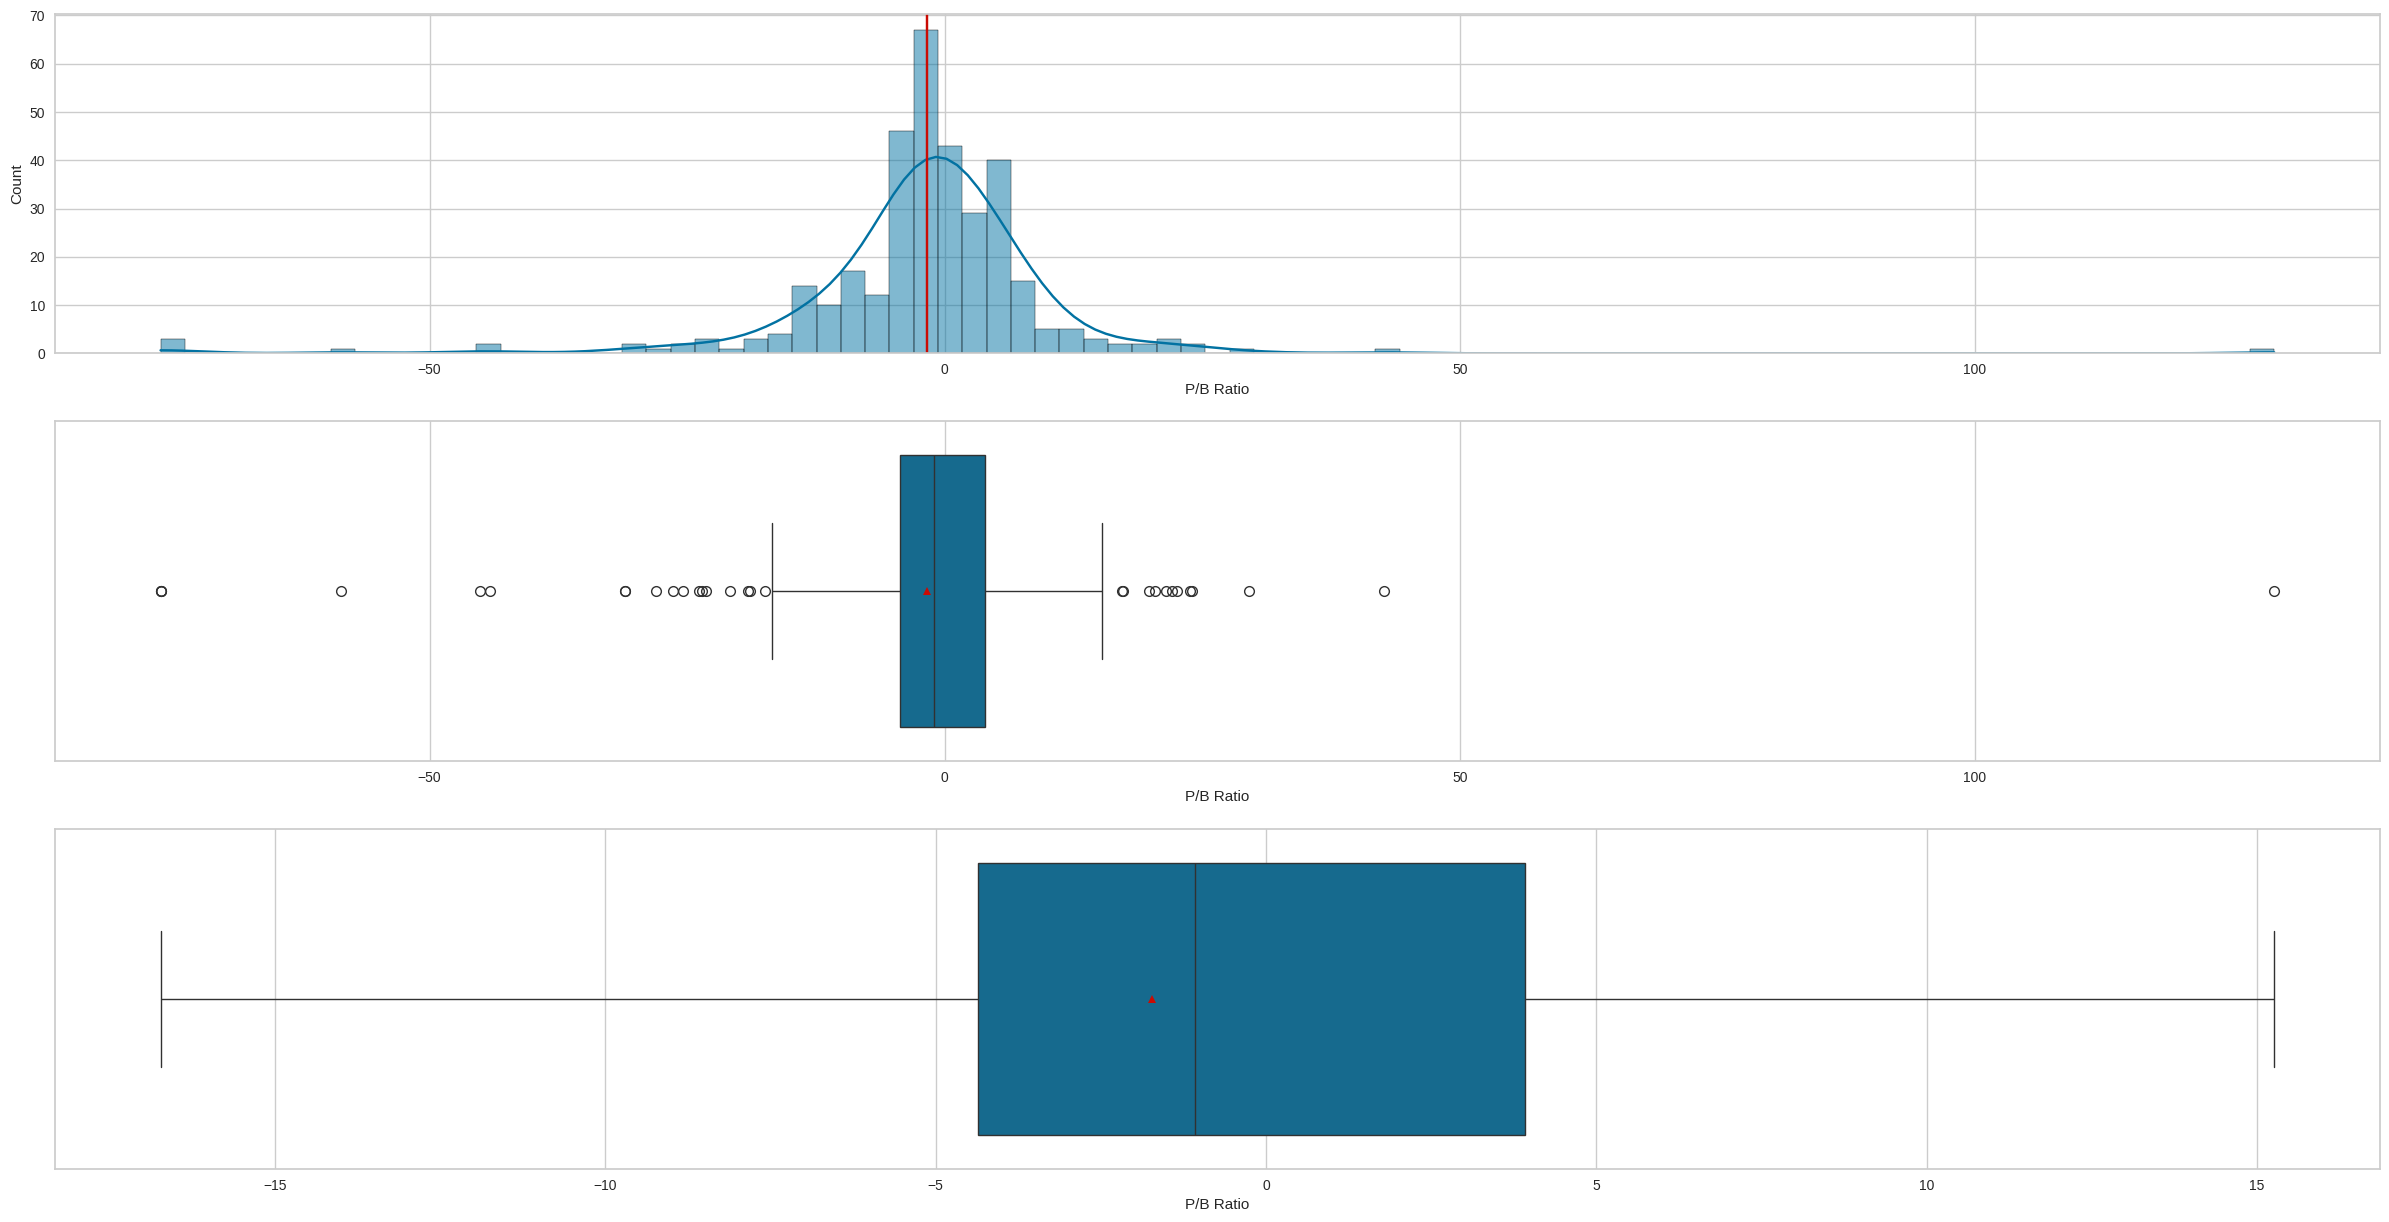

In [28]:
plot_histogram_countplot_boxplot(col_name="P/B Ratio", histplot=True)

P/B Ratio also follows a normal distribution with its mean around 0. There are a few outliers on positive as well as negative side. Hence we can say that any stock is likely to have a P/B ratio between -5 and 5.

## Bivariate Analysis

### Categorical Variables

In [29]:
plot_countplot("GICS Sub Industry", perc=True, rotation=90, fig_size=(200,100), font_size=50, hue="GICS Sector")

Output hidden; open in https://colab.research.google.com to view.

Industrial and Financials have various stocks in them, however Energy has the least variety of stocks

### Numerical Variables

#### Correlation among Numerical Variables

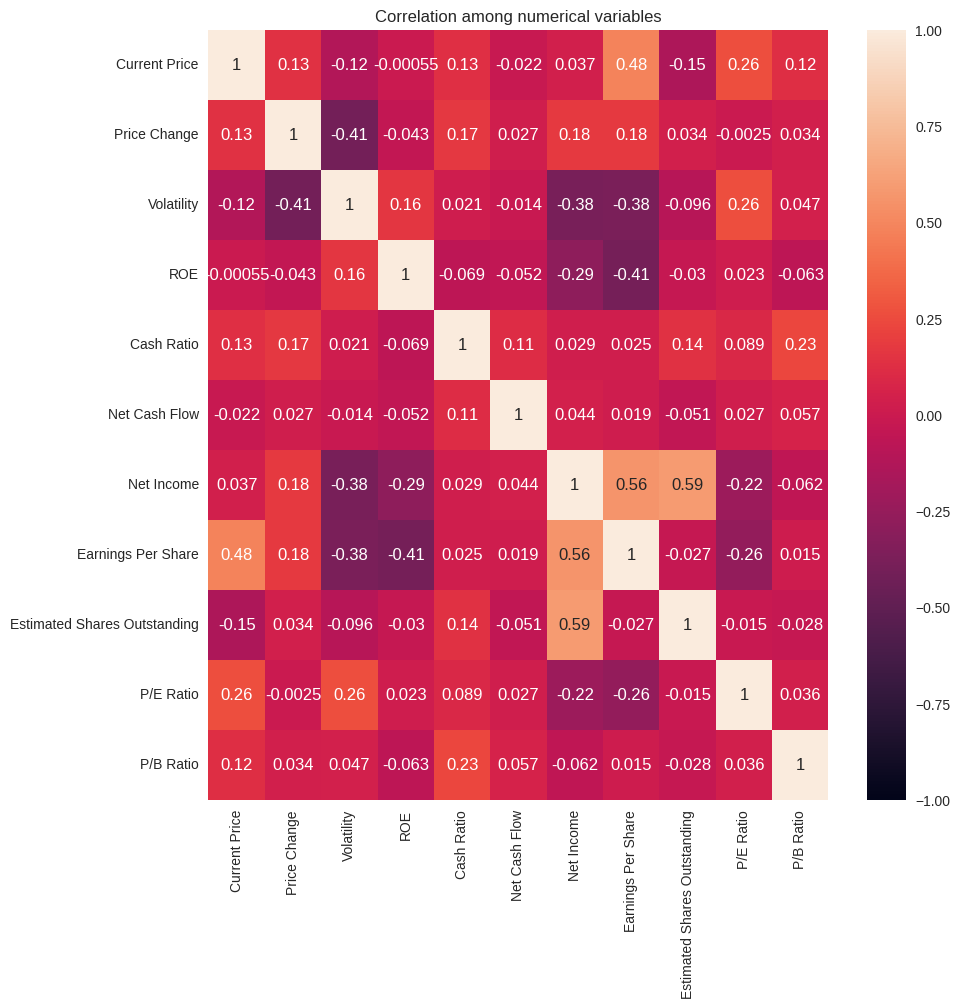

In [30]:
# Setting the correlation plot size
fig, ax = plt.subplots(figsize=(10,10))
# Plotting Heatmap showing the correlation
corr_ = sns.heatmap(data.corr(numeric_only=True), annot=True, ax=ax, vmin=-1, vmax=1);
plt.title("Correlation among numerical variables");

The data shows the following comparatively higher positive correlations:
* Net Income and Estimated Shares Outstanding
* Net Income and Earning per Share
* Current Price and Earning per Share

The data shows the following comparitively higher negative correlations:
* Price Change and Volatility

This is an expected pattern as the current price of the stock is dependent on the income and as well as the return generated for each share. As the net income increases, the company has more shares to give hence following a positive correlation

Price Change and Volatility showing negative correlation is also normal behaviour indicating that as the stock's volatile nature increases the price tends to drop

#### Pairplot w.r.t GICS Sector

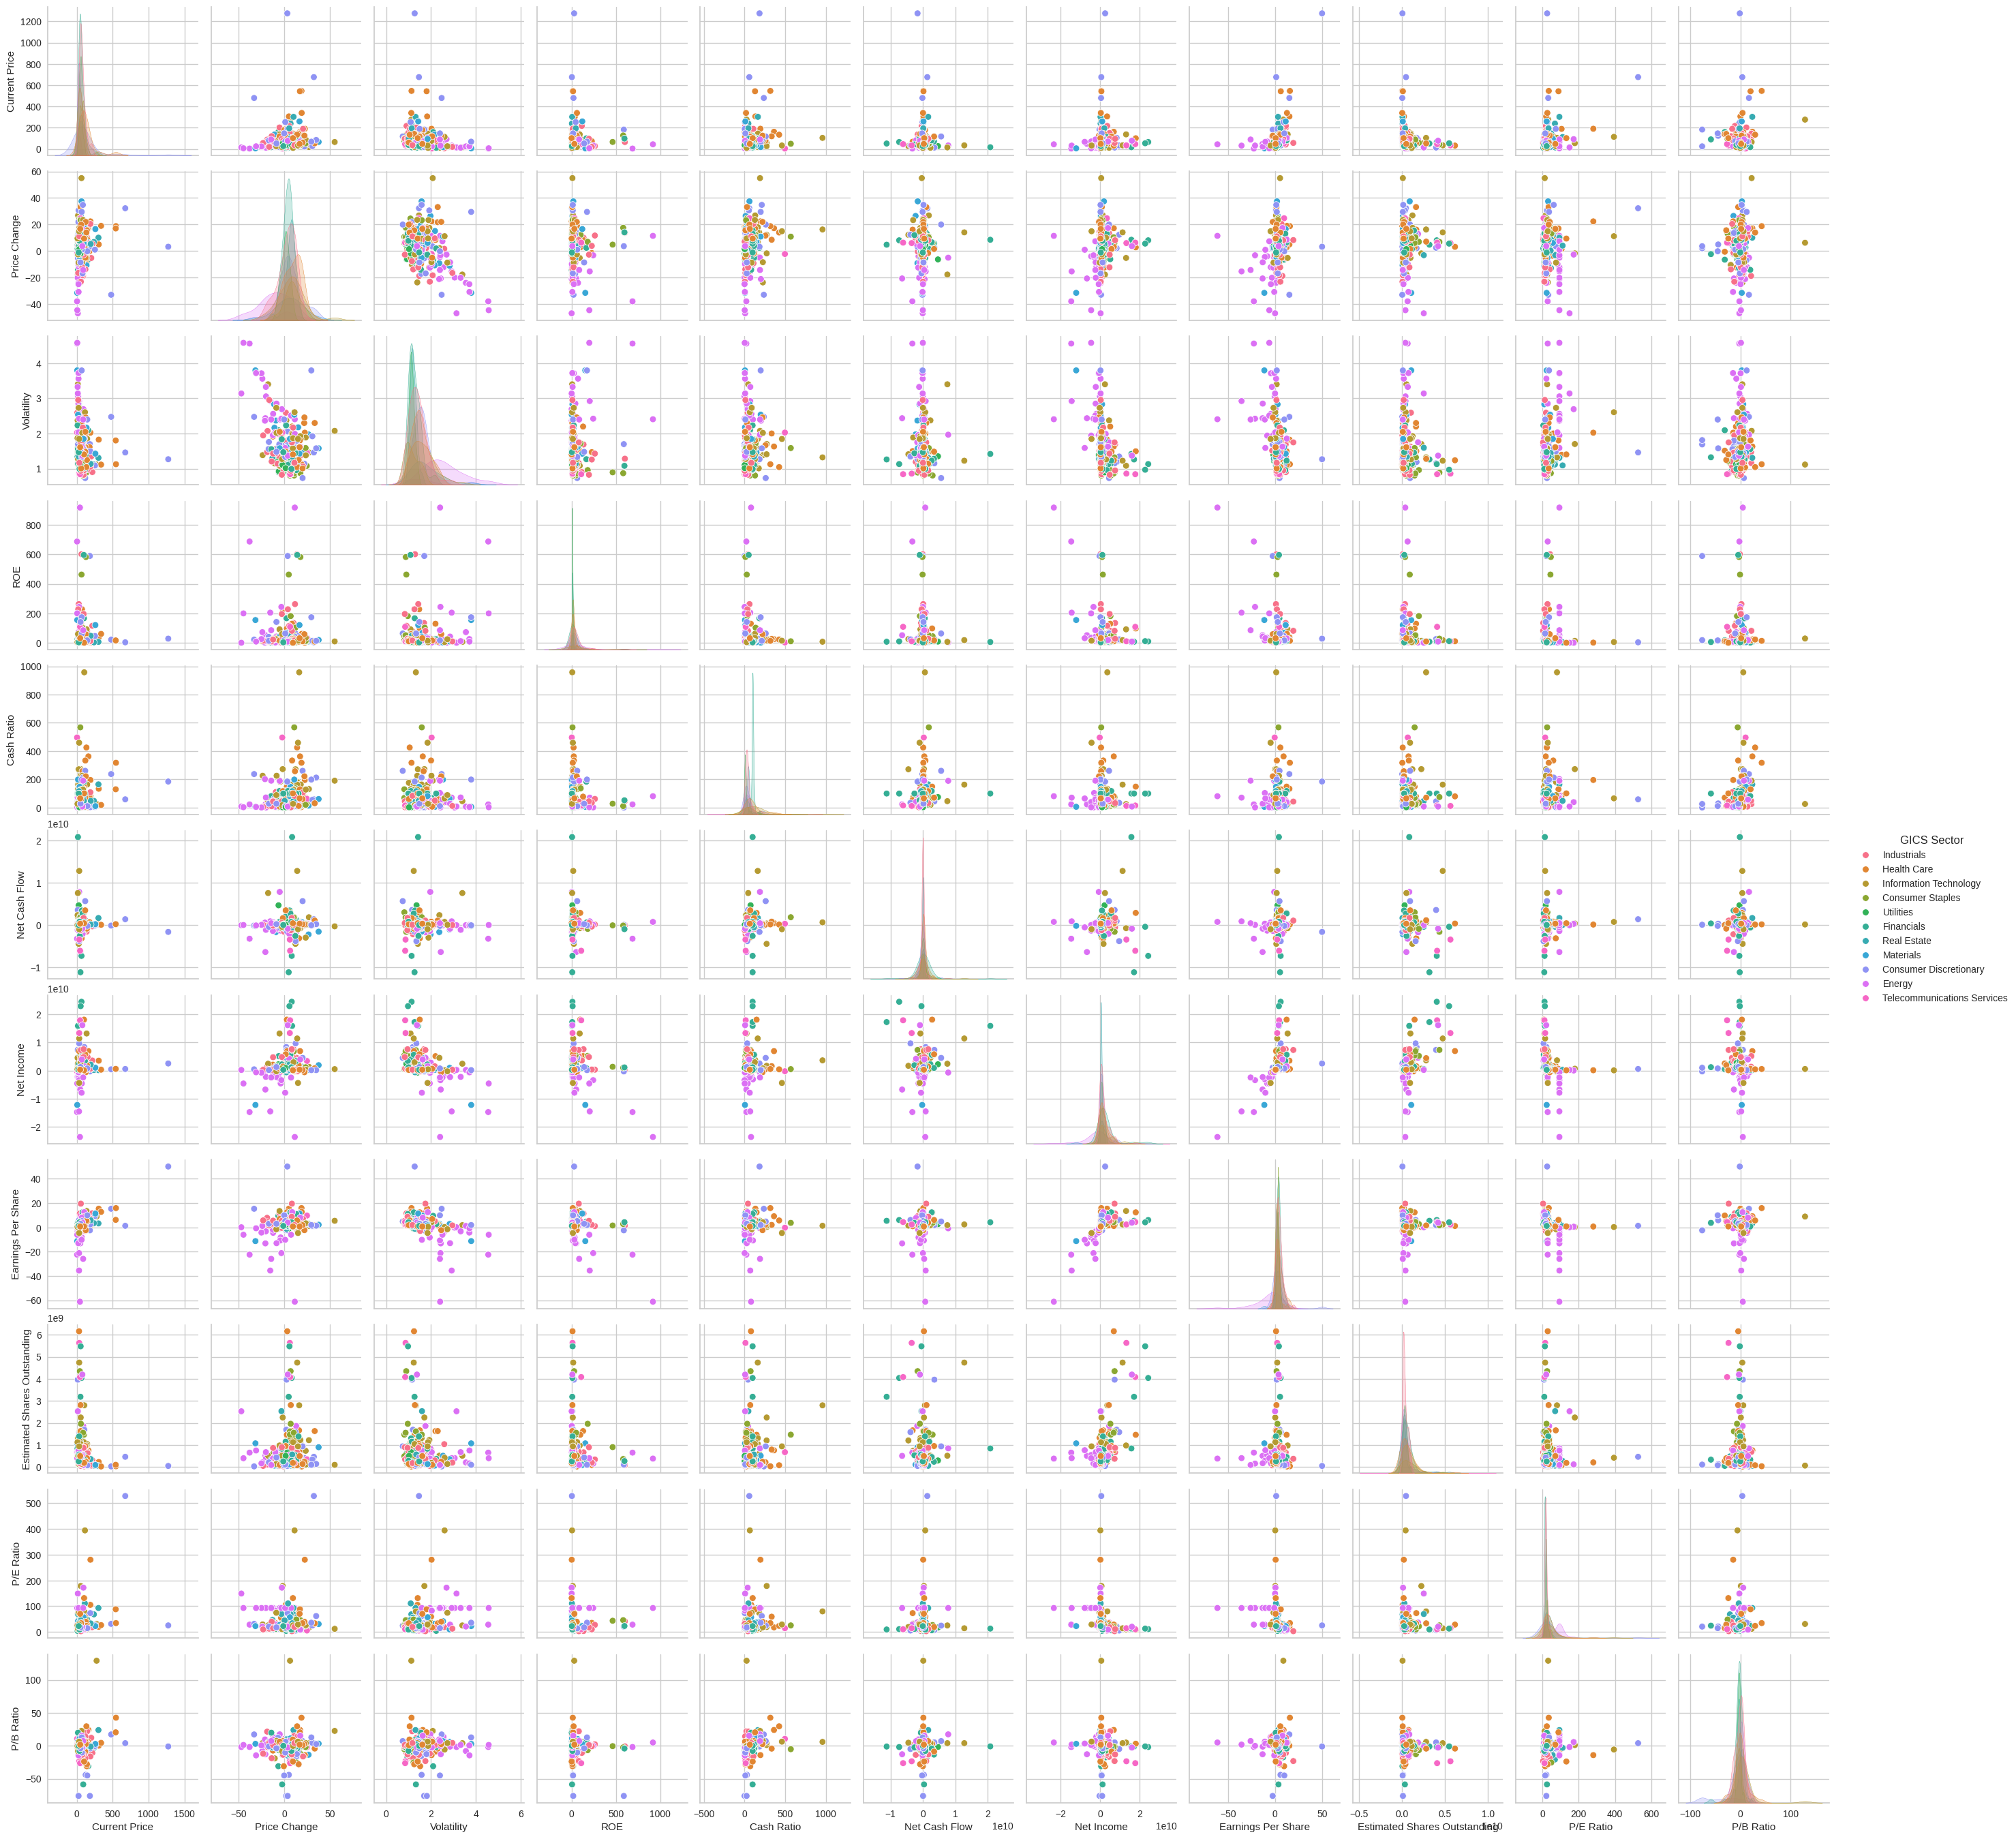

In [31]:
sns.pairplot(data, hue="GICS Sector");

Sector Wise, None of the variables are showing any correlation

#### Pairplot w.r.t GICS Sub Industry

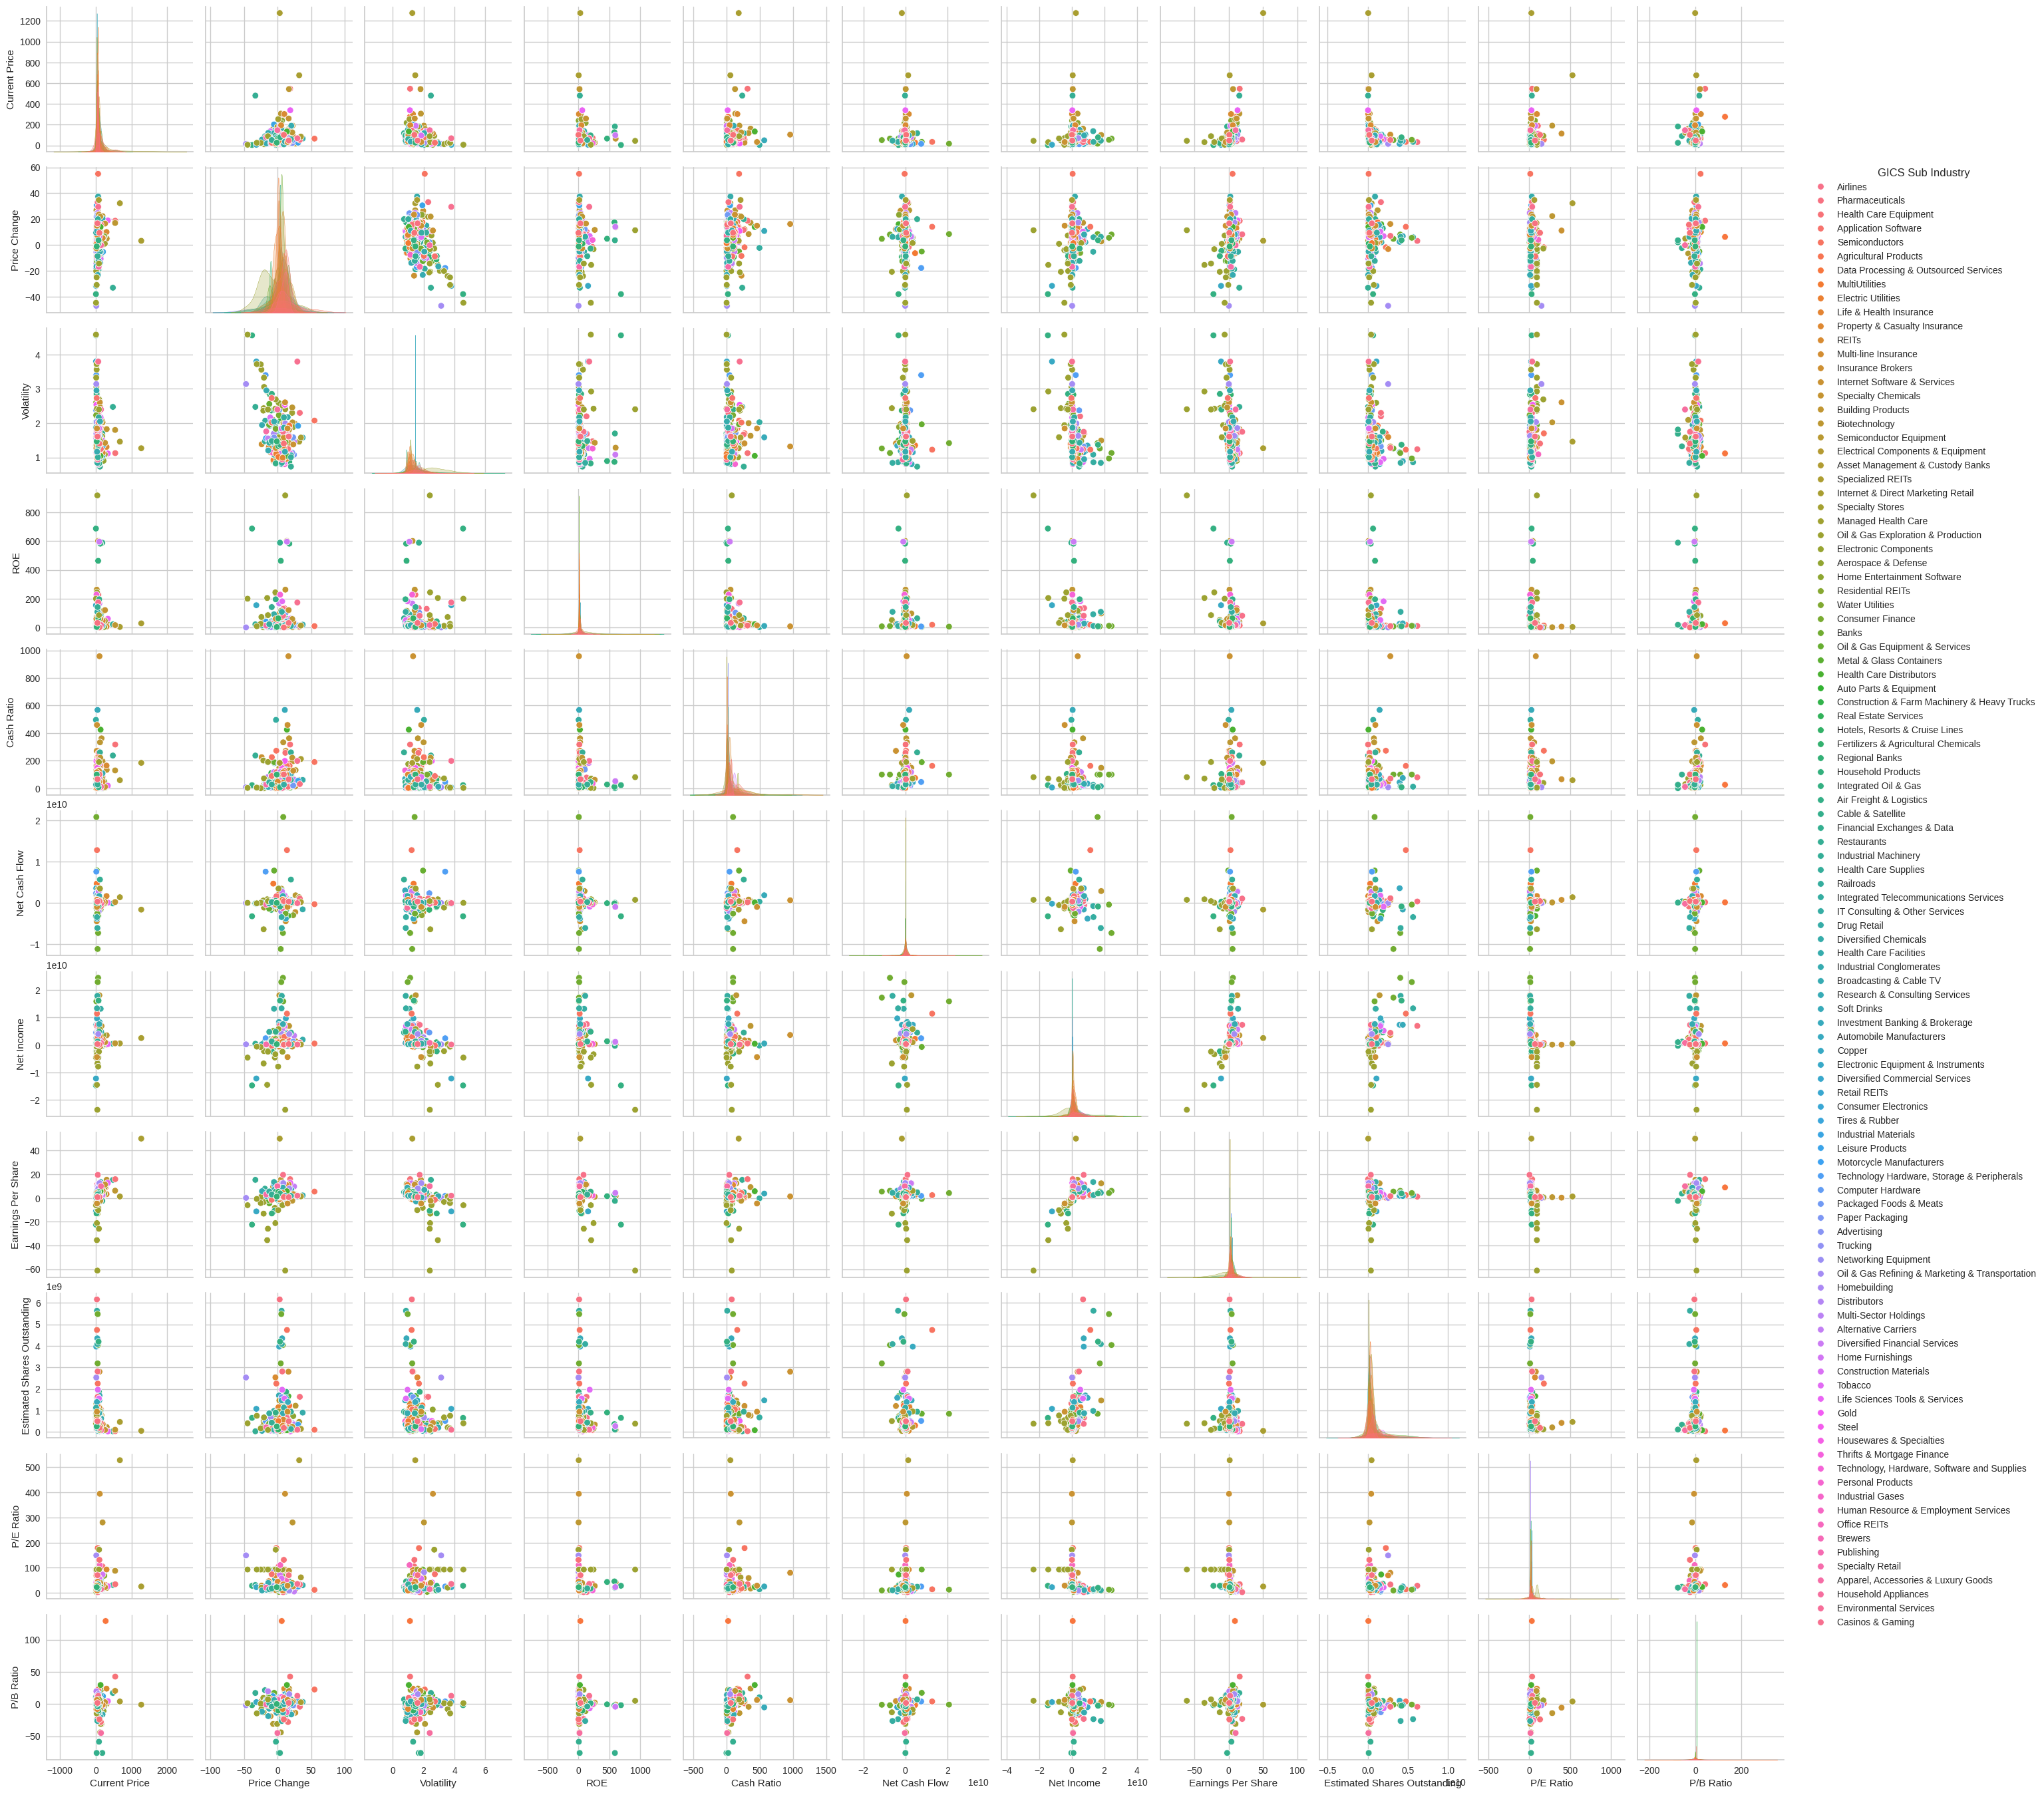

In [32]:
sns.pairplot(data, hue="GICS Sub Industry");

Sub Industry wise, None of the variables are showing any correlation or show very weak correlation

# Data Processing

In [33]:
X = data.drop(columns=['Ticker Symbol'])

## Outlier Detection

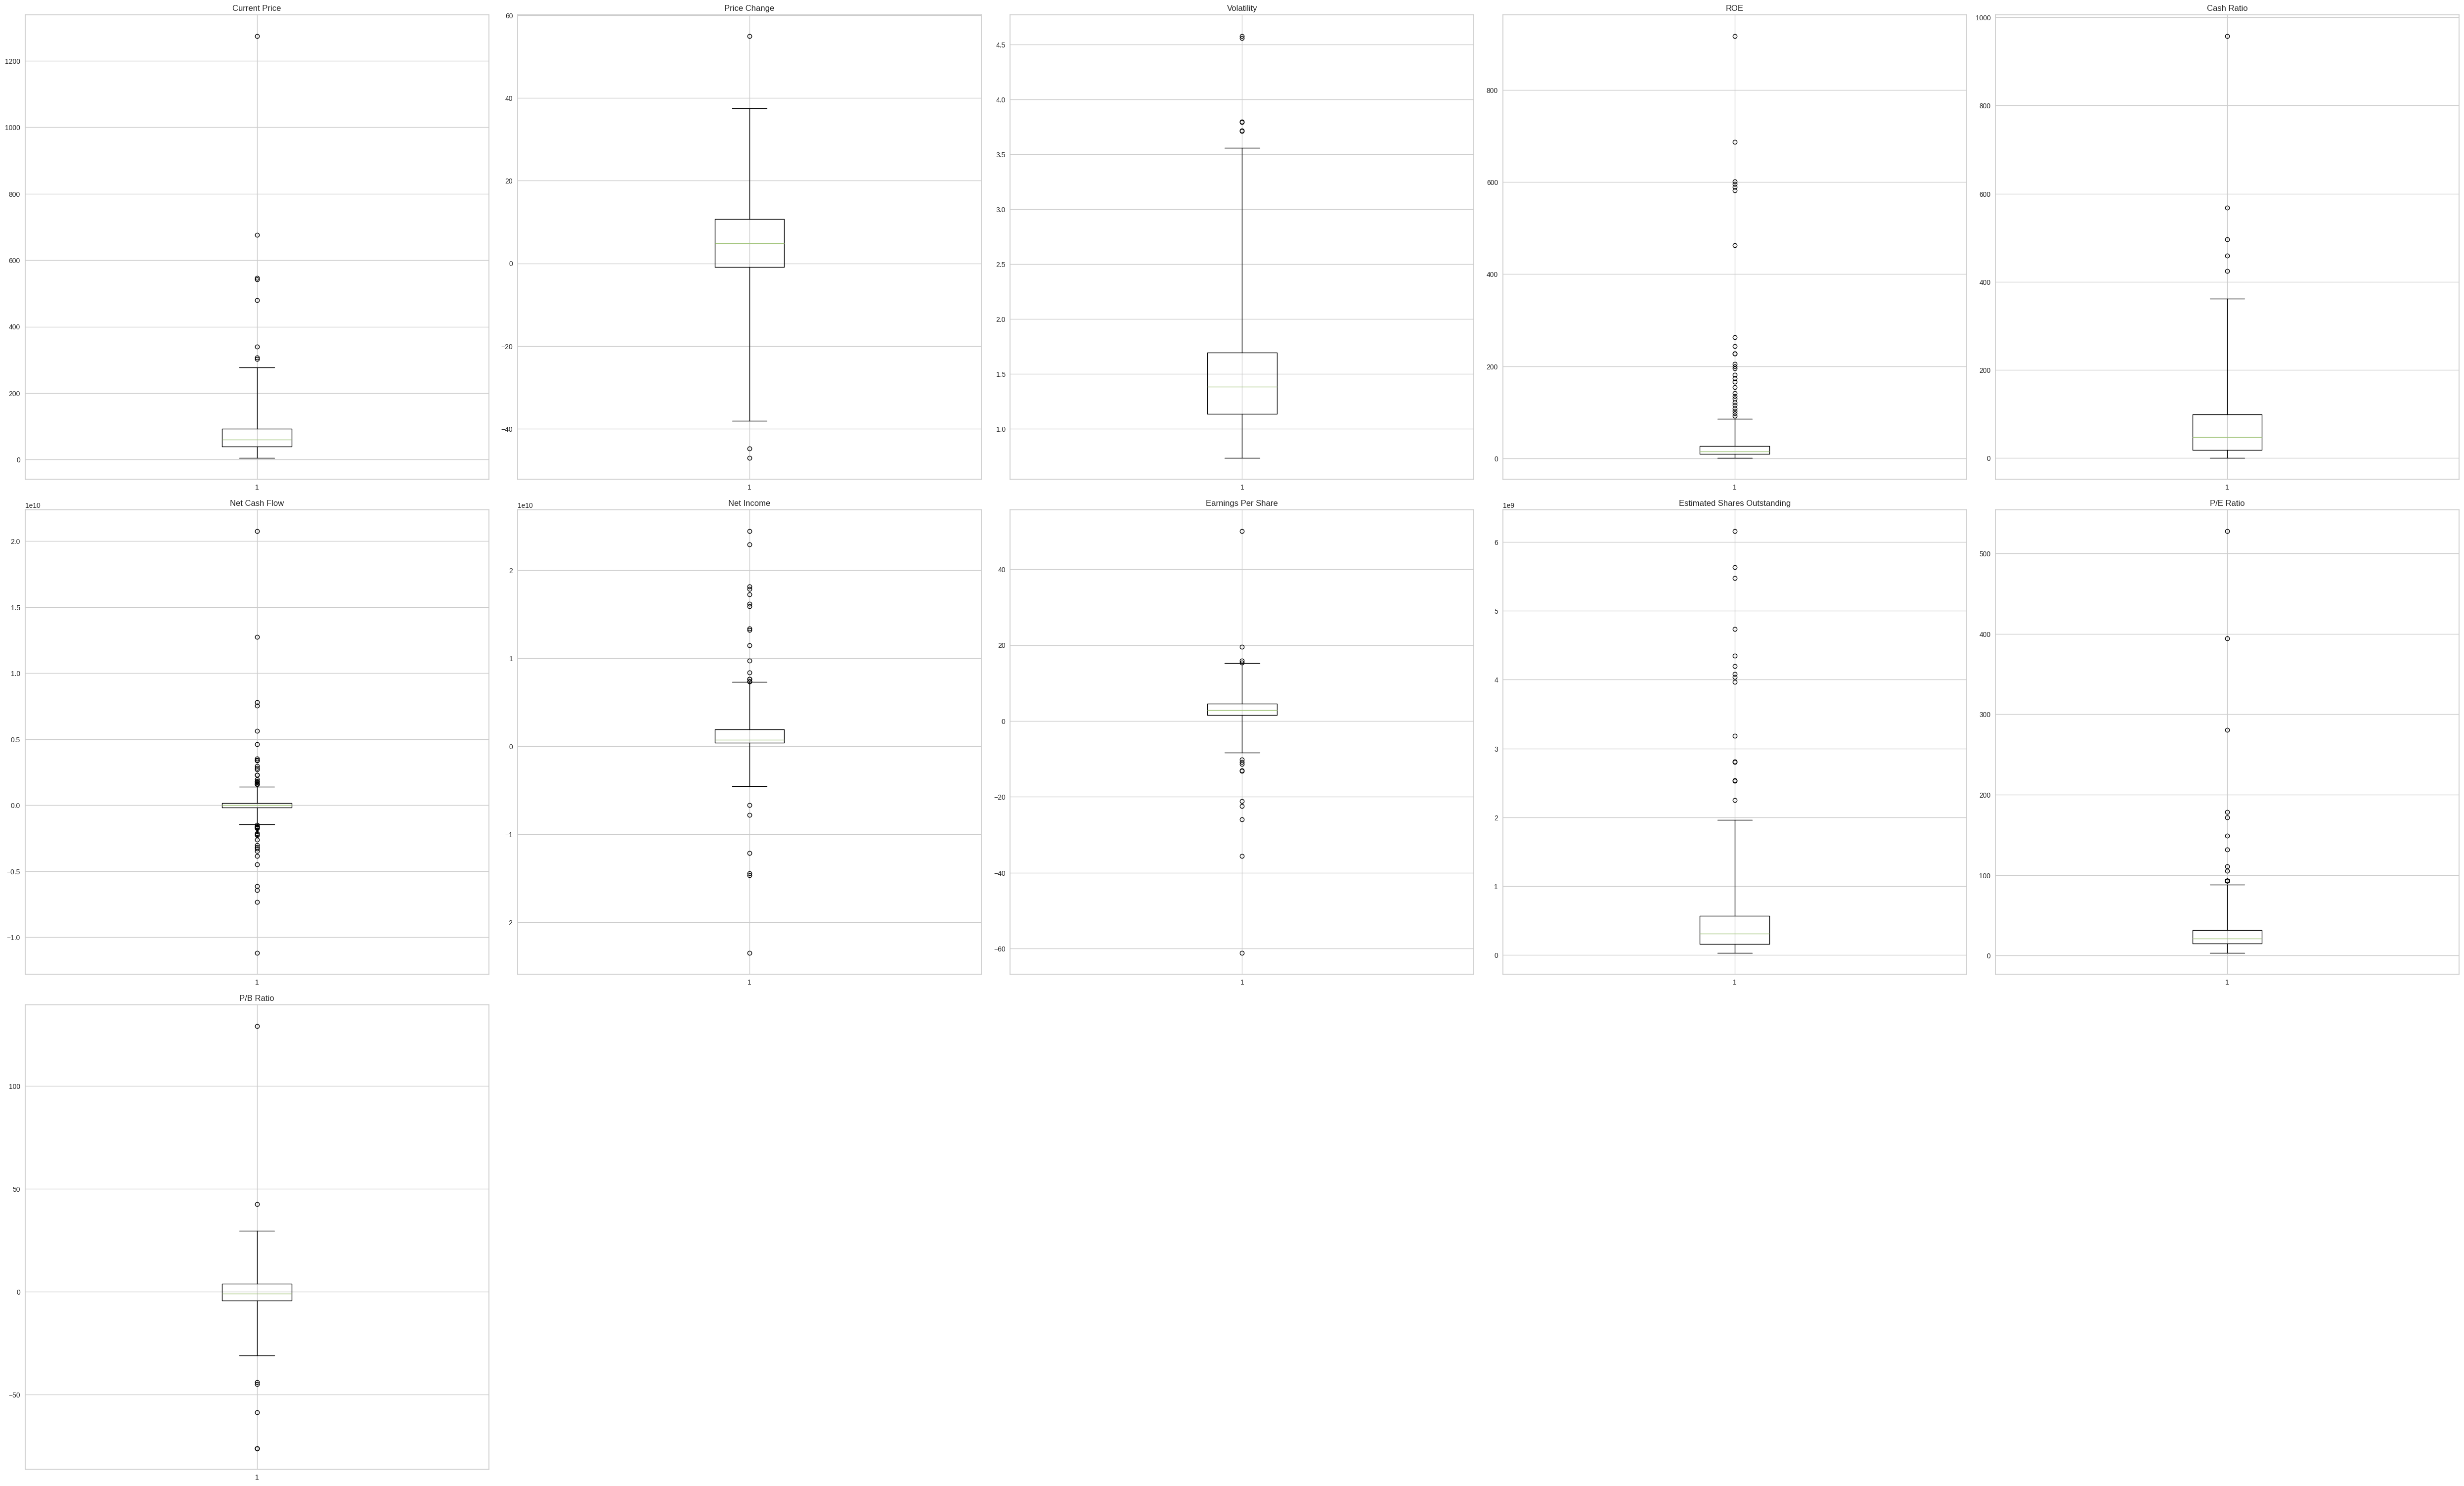

In [34]:
plt.figure(figsize=(50, 50))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(data[variable], whis=3.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are many outliers and treating them would alter the nature of the data, hence no outlier treatment will be carried out

## Data Scaling and Encoding Categorical Variables

In [35]:
## Scaling the Data using Z-score Scaler
scaler = StandardScaler()

scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

X_dummies = pd.get_dummies(X, drop_first=True, dtype=int)

In [36]:
X_dummies.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
0                      0.107863  -0.652487  -0.506653   
1                      1.250274  -0.311769  -0.504205   
2                      1.098021  -0.391502   0.094941   
3                     -0.091622   0.947148   0.424333   
4                      1.978399   3.293307   0.199196   

   GICS Sector_Consumer Staples  GICS Sector_Energy  GICS Sector_Financials  \
0                             0                   0                       0   
1                             0                   0                       0   
2                             0                   0                       0   
3                             0                   0                       0   
4                             0                   0                       0   

   GICS Sector_Health Care  GICS Sector_Industrials  \
0                        0                        1   
1                        1                        0   
2                        1                        0   
3                        0                        0   
4                        0                        0   

   GICS Sector_Information Technology  GICS Sector_Materials  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   1                      0   
4                                   1                      0   

   GICS Sector_Real Estate  GICS Sector_Telecommunications Services  \
0                        0                                        0   
1                        0                                        0   
2                        0                                        0   
3                        0                                        0   
4                        0                                        0   

   GICS Sector_Utilities  GICS Sub Industry_Aerospace & Defense  \
0                      0                                      0   
1                      0                                      0   
2                      0                                      0   
3                      0                                      0   
4                      0                                      0   

   GICS Sub Industry_Agricultural Products  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   GICS Sub Industry_Air Freight & Logistics  GICS Sub Industry_Airlines  \
0                                          0                           1   
1                                          0                           0   
2                                          0                           0   
3                                          0                           0   
4                                          0                           0   

   GICS Sub Industry_Alternative Carriers  \
0                                       0   
1                                       0   
2                                       0   
3  

# K-Means Clustering

#### **Elbow curve**

Number of Clusters: 2 	Average Distortion: 2.8072291420198034
Number of Clusters: 3 	Average Distortion: 2.736206051394397
Number of Clusters: 4 	Average Distortion: 2.689882139301252
Number of Clusters: 5 	Average Distortion: 2.64183233679046
Number of Clusters: 6 	Average Distortion: 2.6002546857137734
Number of Clusters: 7 	Average Distortion: 2.4920680540784943
Number of Clusters: 8 	Average Distortion: 2.463827093073478
Number of Clusters: 9 	Average Distortion: 2.4375718358941327
Number of Clusters: 10 	Average Distortion: 2.378762387871371


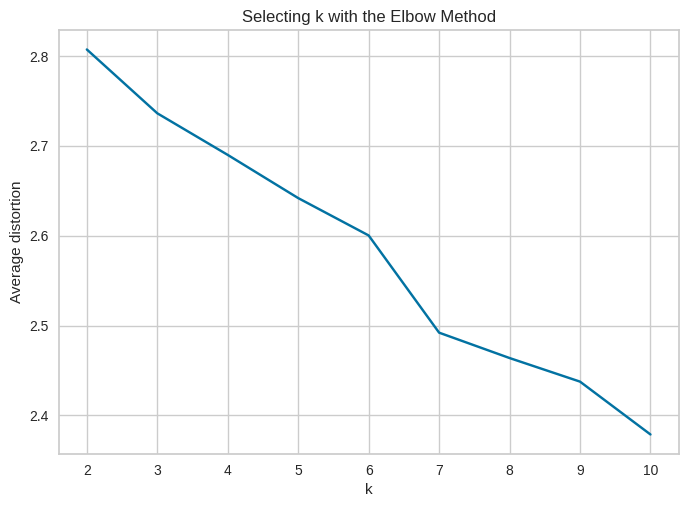

In [37]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X_dummies)
    prediction = model.predict(X_dummies)
    distortion = (
        sum(
            np.min(cdist(X_dummies, model.cluster_centers_, "euclidean"), axis=1)
        )
        / X_dummies.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Since there is a sharp drop between 2 to 3 and 6 to 7. Hence we can optimal values for k is 3 and 7**

#### **Checking of Silhouette Scores**

For n_clusters = 2, the silhouette score is 0.37887805460772617)
For n_clusters = 3, the silhouette score is 0.38459358425469986)
For n_clusters = 4, the silhouette score is 0.34523001544865456)
For n_clusters = 5, the silhouette score is 0.3269482221618451)
For n_clusters = 6, the silhouette score is 0.3107536843350855)
For n_clusters = 7, the silhouette score is 0.33413584653696154)
For n_clusters = 8, the silhouette score is 0.28923044443481616)
For n_clusters = 9, the silhouette score is 0.2757993295087745)
For n_clusters = 10, the silhouette score is 0.2903092958372047)


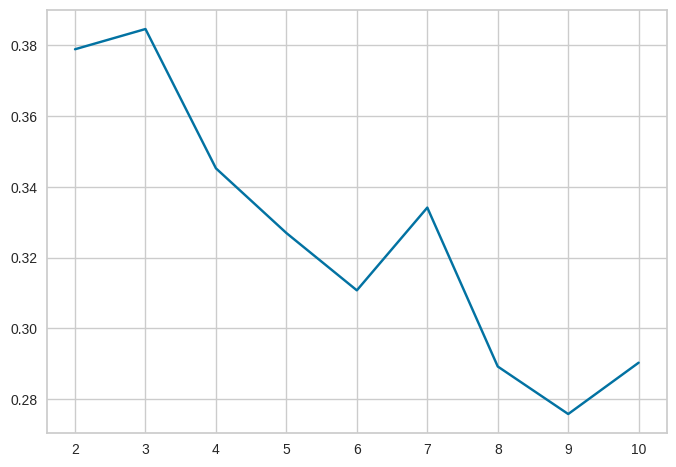

In [38]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict(X_dummies)
    # centers = clusterer.cluster_centers_
    score = silhouette_score(X_dummies, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

From above graph, the silhouette score is higher for 3 and 7 than for other values. **Hence optimal value for k is 3**

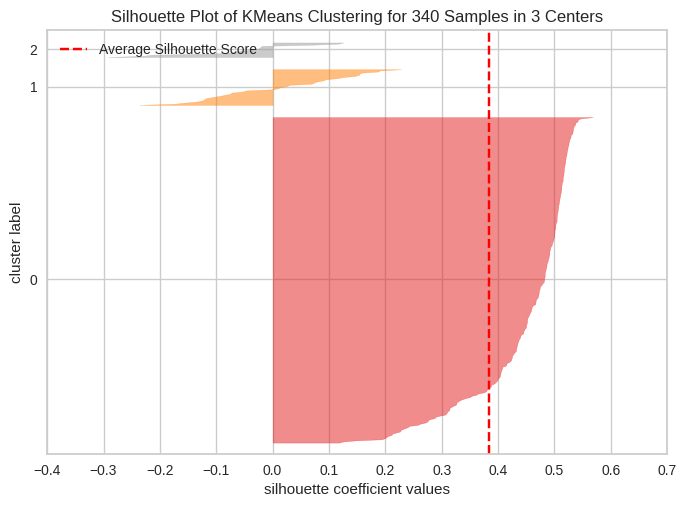

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=0))
visualizer.fit(X_dummies)
visualizer.show()

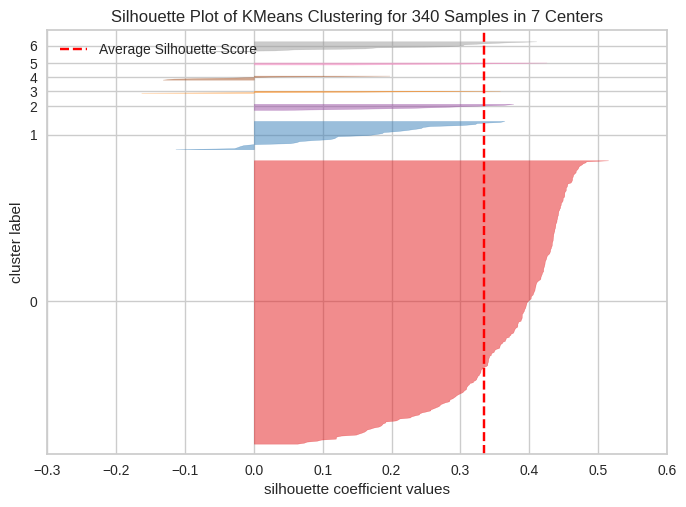

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=0))
visualizer.fit(X_dummies)
visualizer.show()

Even through the Silhouette Plots above, **K=3** shows better results(The clusters have very little very few near zero silhoutte scores)

### Kmeans Clustering with optimal K Value: k=3

In [41]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_dummies)

KMeans(n_clusters=3, random_state=0)

In [42]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
X["K_means_segments"] = kmeans.labels_

In [43]:
data.head()

Ticker Symbol             GICS Sector      GICS Sub Industry  Current Price  \
0           AAL             Industrials               Airlines      42.349998   
1          ABBV             Health Care        Pharmaceuticals      59.240002   
2           ABT             Health Care  Health Care Equipment      44.910000   
3          ADBE  Information Technology   Application Software      93.940002   
4           ADI  Information Technology         Semiconductors      55.320000   

   Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
0      9.999995    1.687151  135          51     -604000000  7610000000   
1      8.339433    2.197887  130          77       51000000  5144000000   
2     11.301121    1.273646   21          67      938000000  4423000000   
3     13.977195    1.357679    9         180     -240840000   629551000   
4     -1.827858    1.701169   14         272      315120000   696878000   

   Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  \
0               11.39                  6.681299e+08    3.718174  -8.784219   
1                3.15                  1.633016e+09   18.806350  -8.750068   
2                2.94                  1.504422e+09   15.275510  -0.394171   
3                1.26                  4.996437e+08   74.555557   4.199651   
4                0.31                  2.247994e+09  178.451613   1.059810   

   K_means_segments  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1

### Cluster Profiling

In [44]:
cluster_profile = data.groupby("K_means_segments")[num_cols].mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["Current Price"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="darkgreen",axis=0)

#### Cluster V/S GICS Sector

In [45]:
pd.crosstab(data.K_means_segments, data["GICS Sector"]).style.highlight_max(color="darkgreen", axis=0)

#### Cluster V/S GICS Sub Industry

In [46]:
pd.crosstab(data.K_means_segments, data["GICS Sub Industry"]).style.highlight_max(color="darkgreen", axis=0)

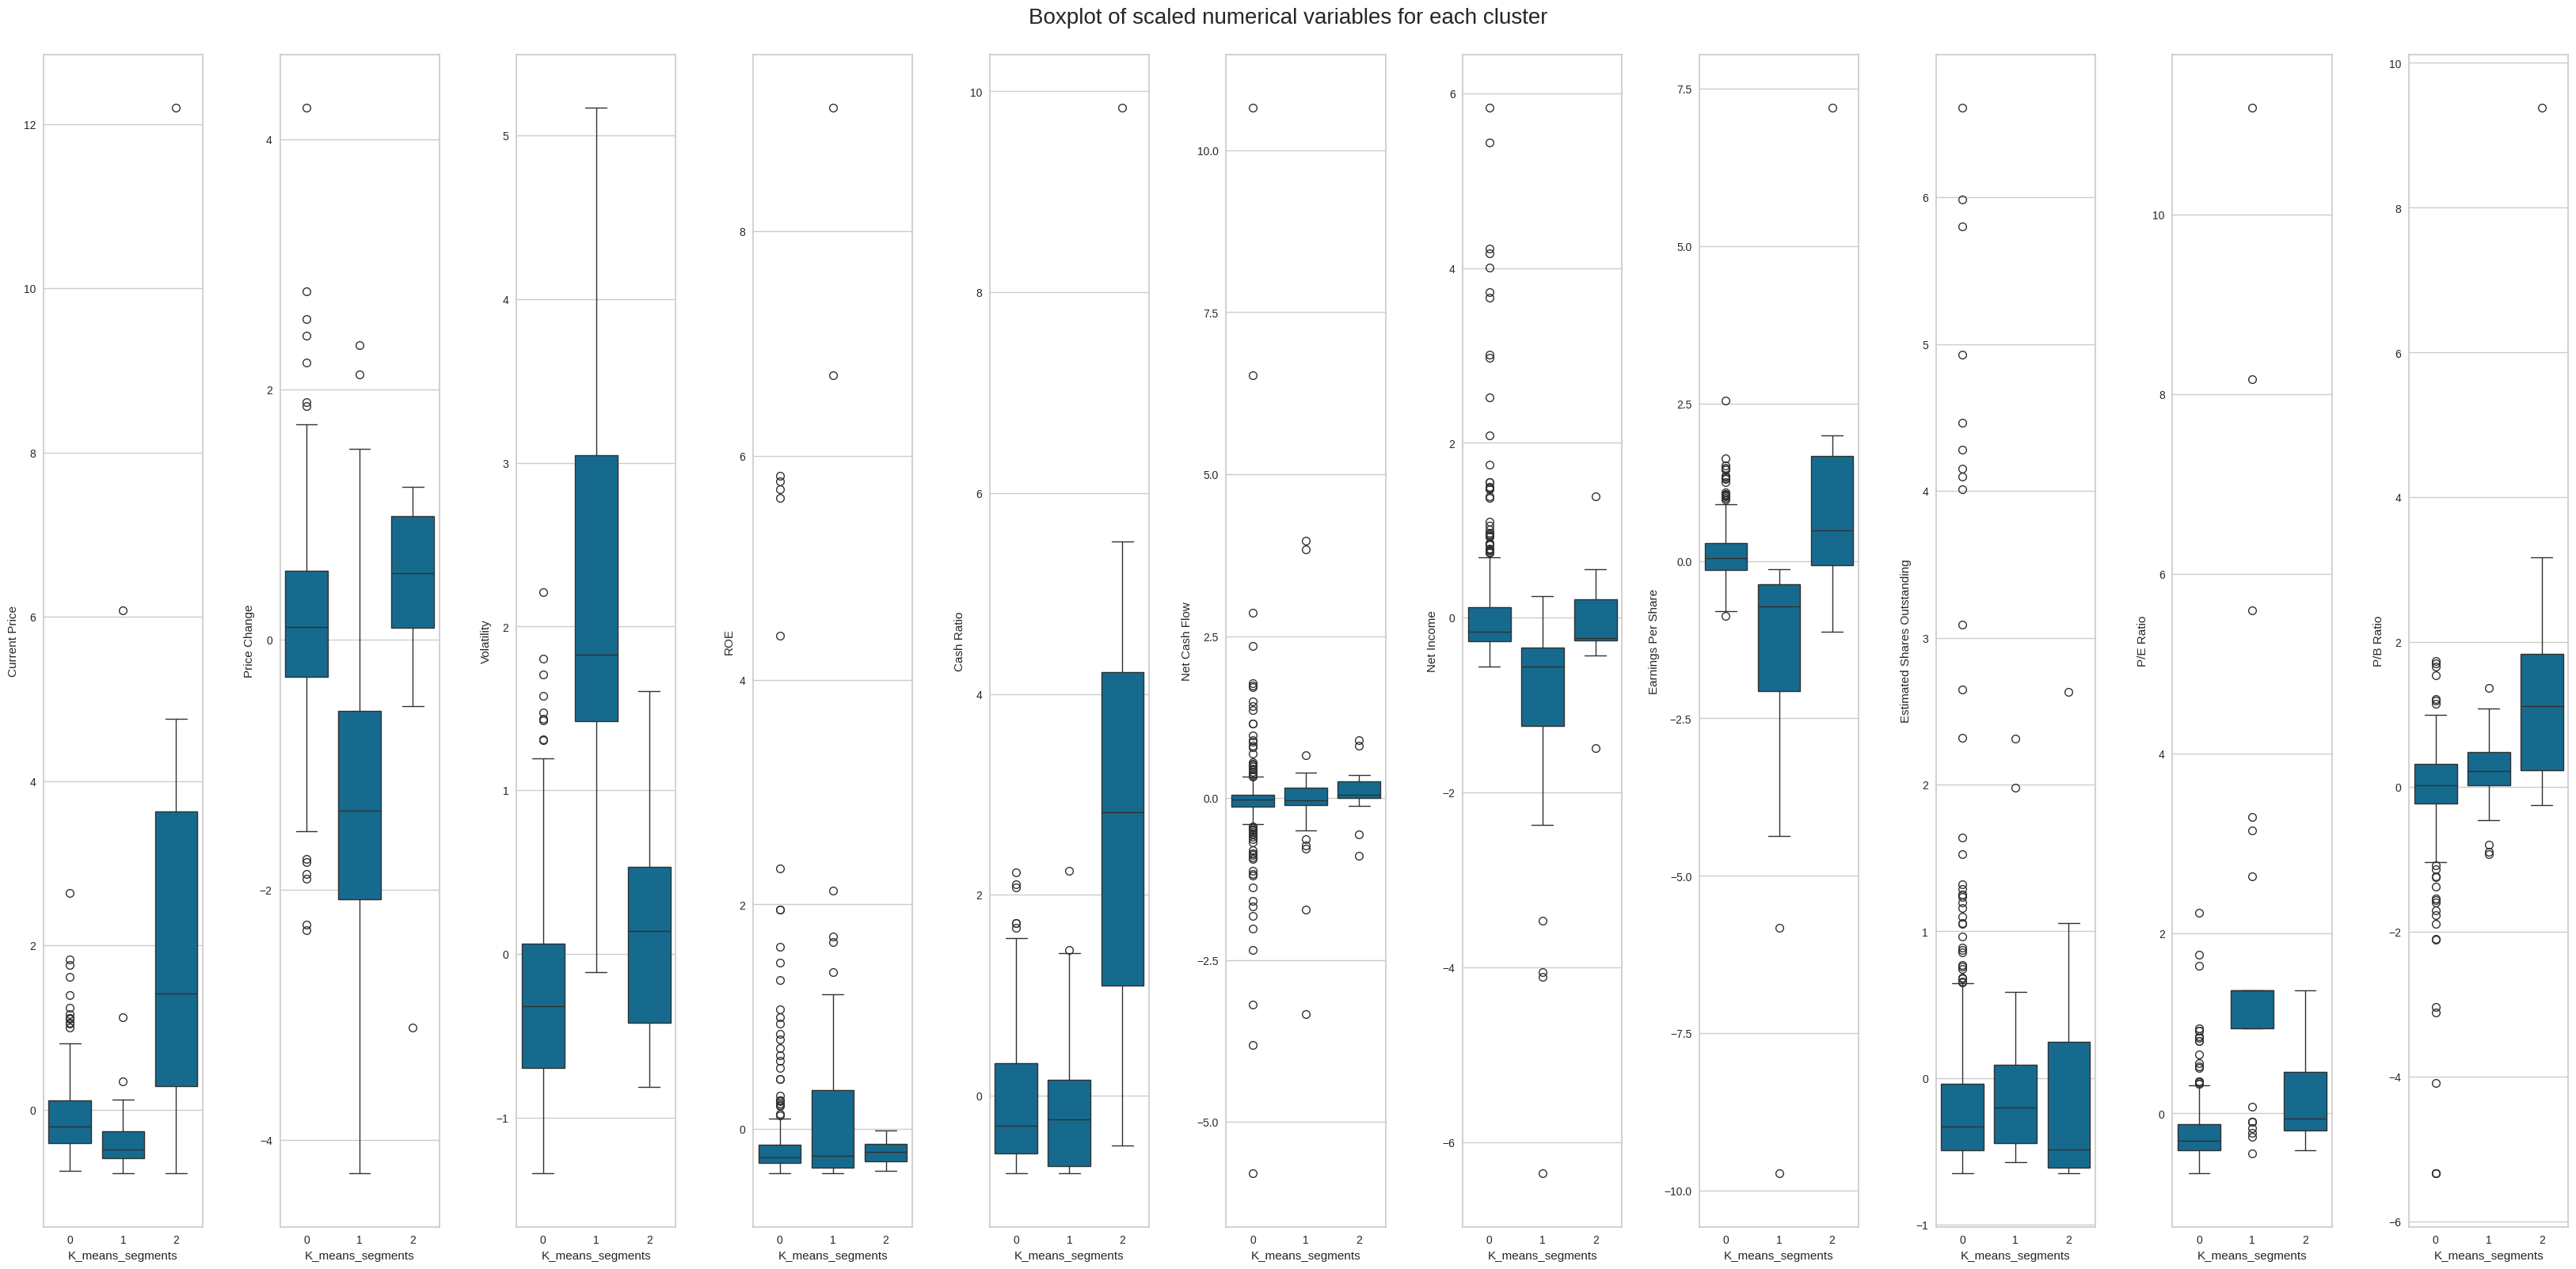

In [47]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(len(num_cols)*3, len(num_cols)*1.5))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(len(num_cols)):
    sns.boxplot(
        ax=axes[ii],
        y=X[num_cols[counter]],
        x=X["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

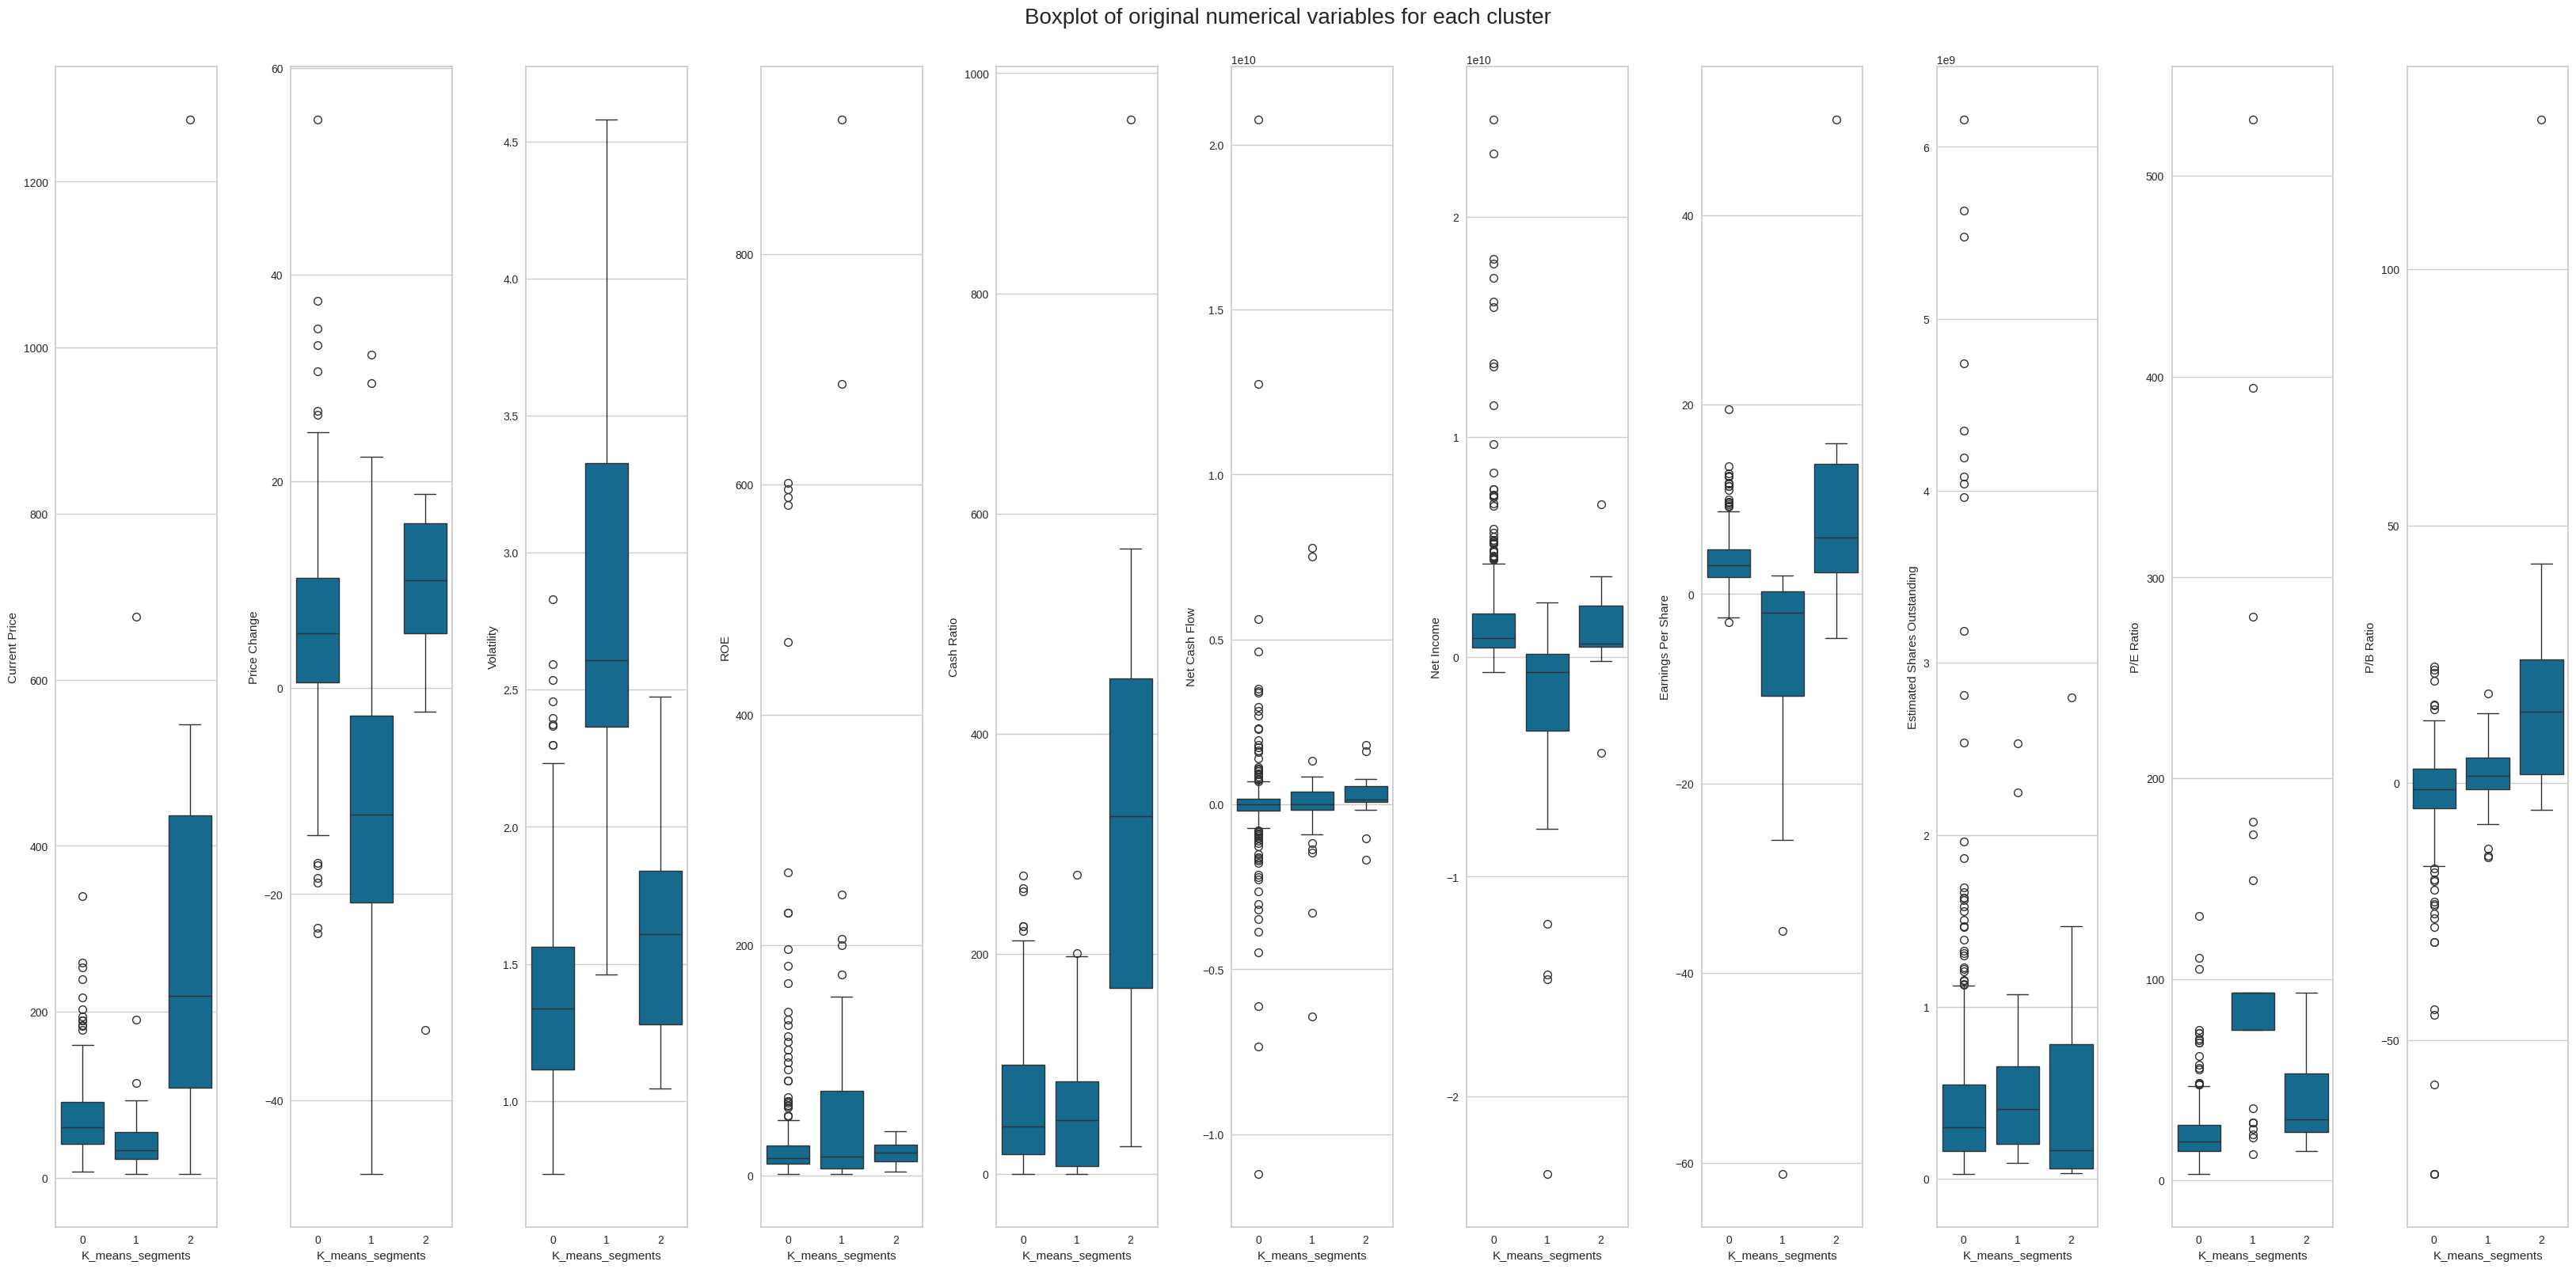

In [48]:
fig, axes = plt.subplots(1, len(num_cols), figsize=(len(num_cols)*3, len(num_cols)*1.5))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(len(num_cols)):
    sns.boxplot(
        ax=axes[ii],
        y=data[num_cols[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### **Cluster Summary**

**Cluster 0**

* These Stocks come from every sector except Energy Sector and Biotechnology, Casinos and Gaming Industries
* Low priced stocks with very high price change
* However the volatility is low indicating that these stocks are
 not reliable in nature.
* Net-Income and Estimated Shares Outstanding is the highest.
* These stocks have very lower return on equity however these stocks are good earnings per share.
* P/E and P/B ratios are also lower in comparison.

**Cluster 1**

* This cluster has Energy related stocks. Other stocks also belong to mostly to government related stocks.
* These stocks are priced the lowest but see very less fluctuations in their price. Hence investors can invest these stocks for a longer term.
* However the Volatility is the highest, indicating that there are still higher number of fluctuations
* ROE is also the highest suggesting the investors have gained good profit over a period of time
* P/E Ratio is the highest for this group suggesting that that these stocks may be expensive but a good P/B ratio shows that the stocks are very well-valued

**Cluster 2**

* Stocks related to Healthcare are present in this cluster which includes Biotechnology and copper stocks. These indicate that these stocks may delve into healthcare innovation stocks
* These stocks are priced the highest and the price change is varies the most for these stocks. This would indicate that the price would fluctuate with any healthcare news.
* Cash ratio is also the highest indicating that there is a good amount of cash reserves present with the companies.
* P/E Ratio is moderate and P/B Ratio is the highest indicating these stocks have good income however are very over valued stocks

# Hierarchial Clustering

## Computing Cophenetic Correlation

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(X_dummies, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(X_dummies))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9192696289462164.
Cophenetic correlation for complete linkage is 0.5839761524776856.
Cophenetic correlation for average linkage is 0.9387918818713881.
Cophenetic correlation for centroid linkage is 0.946013261636426.
Cophenetic correlation for ward linkage is 0.6910854135257704.
Cophenetic correlation for weighted linkage is 0.9017395996624018.


In [50]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.946013261636426, which is obtained with centroid linkage.


## Checking Dendograms

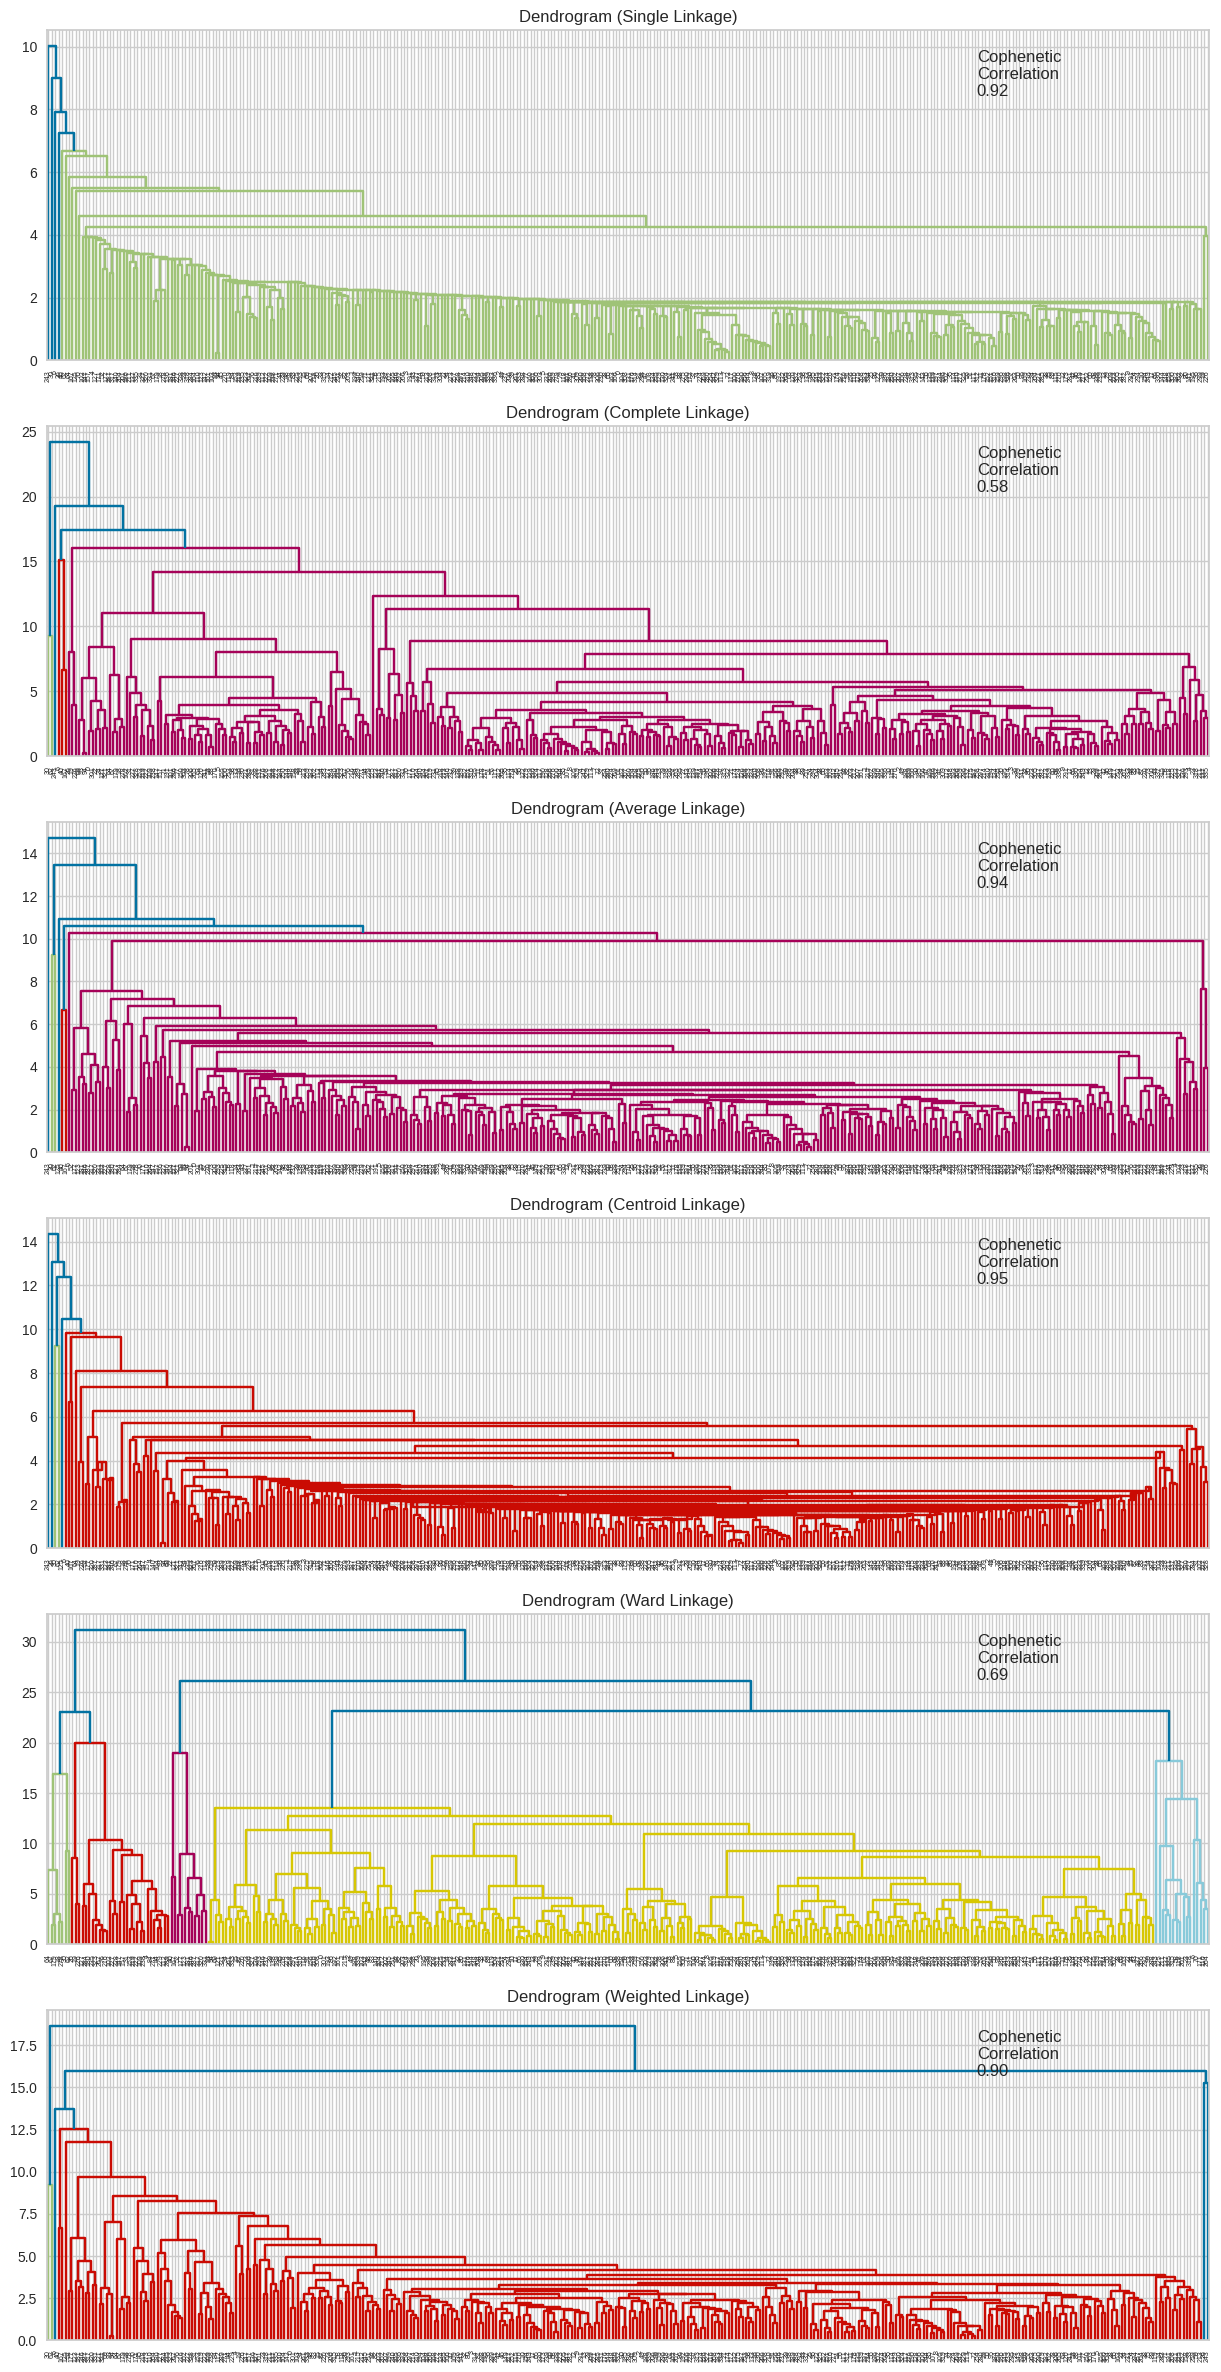

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(X_dummies, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(X_dummies))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Ward Linkage is giving better well-defined clusters

In [52]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc.sort_values("Cophenetic Coefficient")

Linkage  Cophenetic Coefficient
1  complete                0.583976
4      ward                0.691085
5  weighted                0.901740
0    single                0.919270
2   average                0.938792
3  centroid                0.946013

Even though the cophenetic coeficient is the least for Ward Linkage, it is showing us better cluster formation among the datapoints

### Hierarchial Clustering with **Euclidean Distance** and **Ward Linkage**

**Taking n_clusters=9 as there are 9 well-defined clusters which are getting formed**

In [53]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
HCmodel.fit(X_dummies)

AgglomerativeClustering(n_clusters=5)

In [54]:
X["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [55]:
cluster_profile = data.groupby("HC_Clusters")[num_cols].mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Current Price"].count().values
)
# let's display cluster profiles
display(cluster_profile.style.highlight_max(color="darkgreen",axis=0))
display(cluster_profile.style.highlight_min(color="darkred",axis=0))

### Cluster V/s GICS Sector

In [56]:
pd.crosstab(data.HC_Clusters, data["GICS Sector"]).style.highlight_max(color="darkgreen", axis=0)

### Cluster v/s GICS Sub Industry

In [57]:
pd.crosstab(data.HC_Clusters, data["GICS Sub Industry"]).style.highlight_max(color="darkgreen", axis=0)

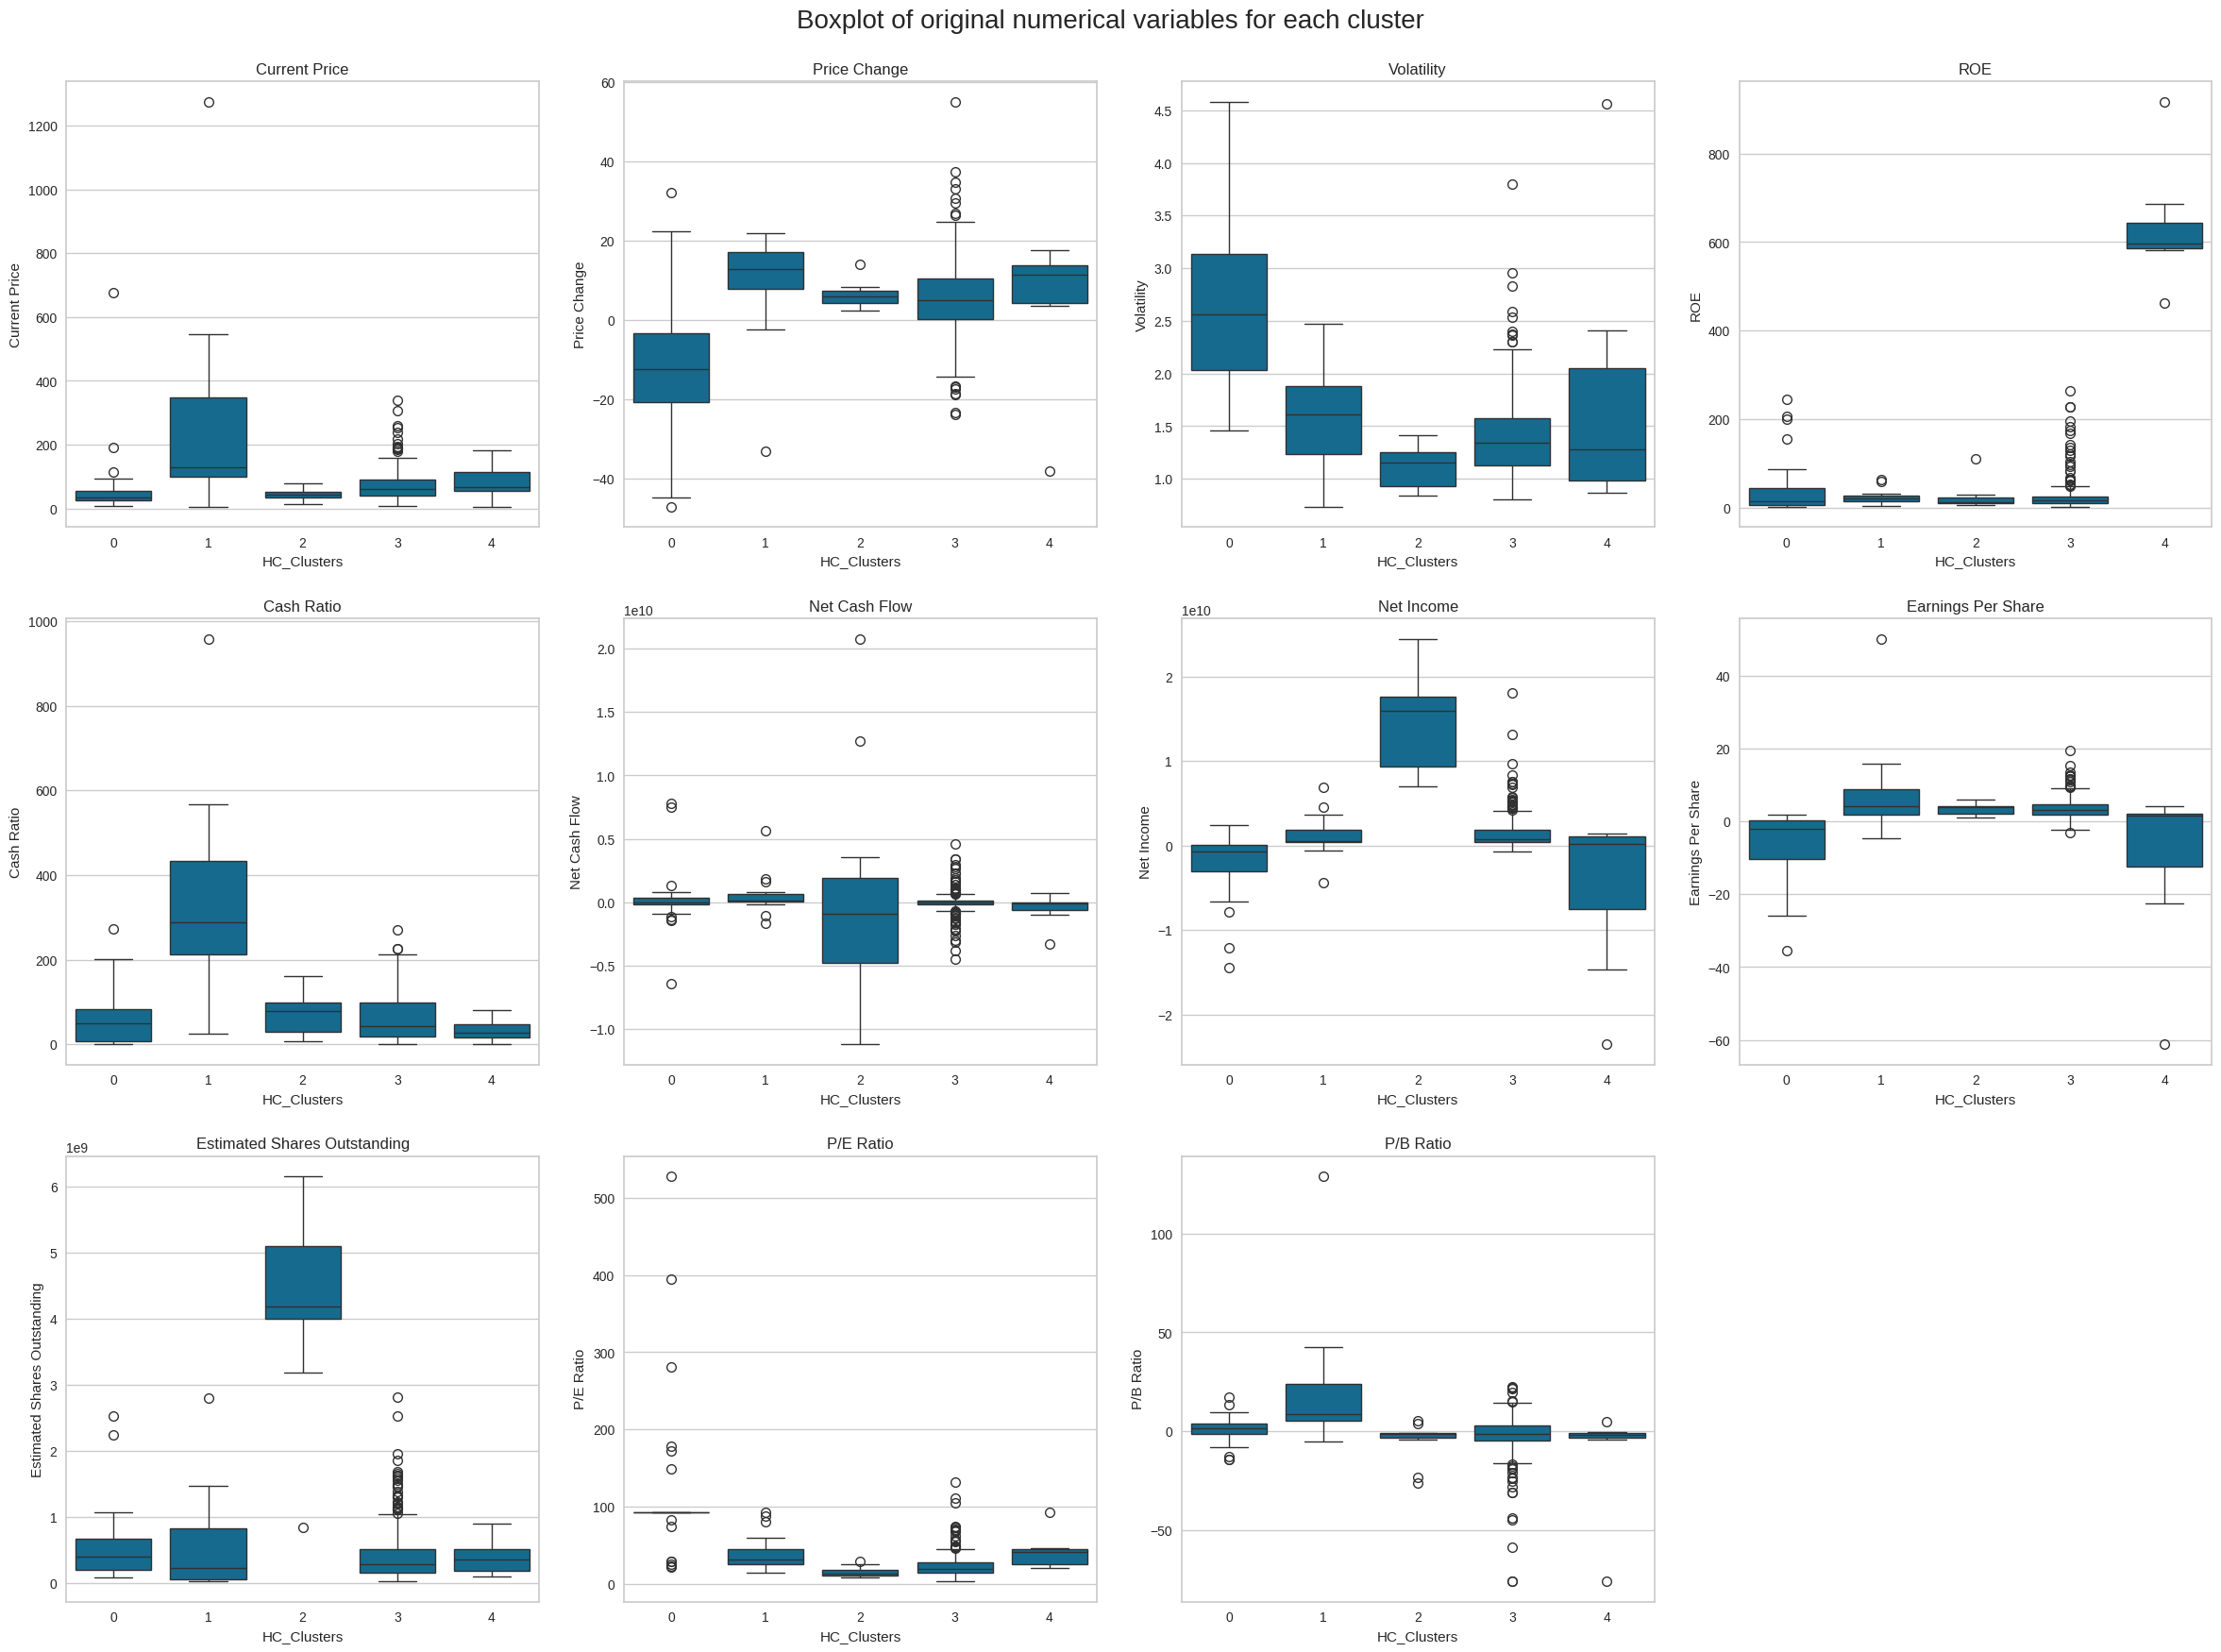

In [58]:
import math

# Assume num_cols and data are already defined
n_rows = 3  # Number of rows
n_cols = math.ceil(len(num_cols) / n_rows)

fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6)  # Adjust figure size
)
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

counter = 0
for ii in range(n_rows):
    for jj in range(n_cols):
        if counter < len(num_cols):  # Check to avoid out-of-bound indexing
            sns.boxplot(
                ax=axes[ii, jj],
                y=data[num_cols[counter]],
                x=data["HC_Clusters"],
            )
            axes[ii, jj].set_title(num_cols[counter])  # Add column name as title
            counter += 1
        else:
            axes[ii, jj].axis("off")  # Turn off unused subplots

fig.tight_layout(pad=2.0)
plt.show()

### Cluster Summary

**Cluster 0**

* This cluster has stocks mainly from Energy Stocks.
* Volatility is the highest indicating these stocks are susceptible to more changes in their prices.
* Majority of the stocks have a very good P/E Ratio which is supported with a good P/B ratio

**Cluster 1**

* This Cluster is the only cluster having Healthcare Stocks and related stocks in them.
* This cluster is having the highest Current Price, Price Change, Cash Ratio and P/B Ratio. This indicates that these stocks tend to be stable in nature as well as over-valued.
* It also has lower ROE range indicating the returns over the past 13 weeks aren't that great.
* Lower range of Estimated Shares of Outstanding indicates that there are less number of shares available with them

**Cluster 2**
* This Sector has Financials(concentrating on Banks) and Telecommunication Stocks.
* With a narrower Price Change and lower Volatility, these stocks can be said to be more stable in nature.
* Since these are more stable stocks and the price change is narrower, the ROE is also less in comparison to other clusters
* P/E Ratio is also the least which can be inferred from the narrow ROE curve
* Net Income is also the highest for this cluster

**Cluster 3**
* This is the cluster with highest number of outliers. This cluster contains stocks from all the industries
* All the parameters are mediocre in range.
* However Net Flow Cash is the parameter having most number of outliers indicating that various size of companies are present in this cluster

**Cluster 4**
* This cluster has stocks from Consumer Products.
* This Cluster has the highest Return on Equity and lowest range of volatility.
* The average Net Income is the negative range indicating that these stocks do not have very good income.
* However, even having the lowest P/B Ratio, These stocks are not very susceptible to volality  

# Comparison Between K-Means and Hierarchial Clustering

K-Means CLustering and Hierarchial Clustering are proven techniques to find the best groups among unclassified stocks.
The stocks provided by the consultancy firm do have very distinguishable characteristics and can be said to "softly" divided into classes.
Hence, K-Means Clustering provides groups which mix into each other since the "k" value could be properly defined with elbow method.

Whereas Hierarchial Clustering proved to be helpful as it provided clearly demarcated groups among the stocks which is visible from the cluster profile that is created by hierarchial clustering.

From the above Clusterings, we can say that K-Means Cluster No. 0 and Hierarchial CLuster No. 3 are similar in nature having maximum number of stocks as well as the behaviour of the cluster is similar.

However Hierarchial clustering was able to churn out better clusters which could be specifically attributed to specific sectors which would help investors not only look into the technicals but also the fundamentals of the stock

# Business Recommendations

The firm can do the following to improve their stock recommendations:

* Give insights about the stocks to the investors so that they can make an informed decision.
* The consultancy firm can use the above groupings to assess whether the investor is more interested in the technicals or the fundamentals of the stock.
* These groupings can also be used to assess the risk appetite of the investor and be used to suggest the stocks accordingly.
* Portfolio diversification can also be done using these groups.